In [1]:
!pip install torch numpy transformers datasets tiktoken wandb tqdm

     |████████████████████████████████| 797.1 MB 4.7 kB/s  eta 0:00:01
     |████████████████████████████████| 19.5 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 47.2 MB/s eta 0:00:01
     |████████████████████████████████| 474 kB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 196.0 MB 33.5 MB/s eta 0:00:01   |▍                               | 2.3 MB 44.3 MB/s eta 0:00:05     |██████████████████              | 110.2 MB 29.8 MB/s eta 0:00:03
     |████████████████████████████████| 209.4 MB 149 kB/s  eta 0:00:01     |███████████████████████         | 150.0 MB 42.7 MB/s eta 0:00:02
     |████████████████████████████████| 664.8 MB 4.5 kB/s  eta 0:00:01    |███▋                            | 74.4 MB 49.8 MB/s eta 0:00:12██████████████▏           | 4

     |████████████████████████████████| 316 kB 47.2 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 453 kB 34.9 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 20.3 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 39.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 142 kB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 28.0 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 35.9 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 31.6 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 45.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
!python data/shakespeare_char/prepare.py

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens


In [11]:
# first, try to run training without logging

!python train.py config/train_shakespeare_char.py --device=cpu --compile=False \
        --eval_iters=20 --log_interval=1 --block_size=64 --batch_size=12 --n_layer=4 \
        --n_head=4 --n_embd=128 --max_iters=2000 --lr_decay_iters=2000 --dropout=0.0

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

iter 128: loss 2.5634, time 73.01ms, mfu 0.02%
iter 129: loss 2.5518, time 109.80ms, mfu 0.02%
iter 130: loss 2.5630, time 134.13ms, mfu 0.02%
iter 131: loss 2.5208, time 107.89ms, mfu 0.02%
iter 132: loss 2.5362, time 142.08ms, mfu 0.02%
iter 133: loss 2.6503, time 132.28ms, mfu 0.02%
iter 134: loss 2.5361, time 82.07ms, mfu 0.02%
iter 135: loss 2.5202, time 57.99ms, mfu 0.02%
iter 136: loss 2.6047, time 78.71ms, mfu 0.02%
iter 137: loss 2.5531, time 81.63ms, mfu 0.02%
iter 138: loss 2.5638, time 48.14ms, mfu 0.02%
iter 139: loss 2.5591, time 36.30ms, mfu 0.02%
iter 140: loss 2.5761, time 29.45ms, mfu 0.02%
iter 141: loss 2.5848, time 29.42ms, mfu 0.02%
iter 142: loss 2.4679, time 138.77ms, mfu 0.02%
iter 143: loss 2.5622, time 62.18ms, mfu 0.02%
iter 144: loss 2.6098, time 188.31ms, mfu 0.02%
iter 145: loss 2.5318, time 46.28ms, mfu 0.02%
iter 146: loss 2.5750, time 55.64ms, mfu 0.02%
iter 147: loss 2.5083, time 47.61ms, mfu 0.02%
iter 148: loss 2.4648, time 31.61ms, mfu 0.02%
iter 1

iter 301: loss 2.3994, time 72.62ms, mfu 0.02%
iter 302: loss 2.3506, time 33.83ms, mfu 0.02%
iter 303: loss 2.3814, time 32.26ms, mfu 0.03%
iter 304: loss 2.4045, time 31.11ms, mfu 0.03%
iter 305: loss 2.4102, time 32.85ms, mfu 0.03%
iter 306: loss 2.4271, time 44.90ms, mfu 0.03%
iter 307: loss 2.5094, time 59.73ms, mfu 0.03%
iter 308: loss 2.5031, time 60.43ms, mfu 0.03%
iter 309: loss 2.3853, time 158.79ms, mfu 0.02%
iter 310: loss 2.3988, time 113.28ms, mfu 0.02%
iter 311: loss 2.4088, time 77.41ms, mfu 0.02%
iter 312: loss 2.4364, time 57.16ms, mfu 0.02%
iter 313: loss 2.3780, time 58.58ms, mfu 0.02%
iter 314: loss 2.3922, time 49.87ms, mfu 0.02%
iter 315: loss 2.3920, time 46.63ms, mfu 0.02%
iter 316: loss 2.4511, time 32.70ms, mfu 0.02%
iter 317: loss 2.4289, time 79.26ms, mfu 0.02%
iter 318: loss 2.4147, time 52.03ms, mfu 0.02%
iter 319: loss 2.3682, time 41.36ms, mfu 0.02%
iter 320: loss 2.3982, time 57.11ms, mfu 0.02%
iter 321: loss 2.4316, time 38.85ms, mfu 0.03%
iter 322: l

iter 476: loss 2.2716, time 41.12ms, mfu 0.03%
iter 477: loss 2.3534, time 79.22ms, mfu 0.03%
iter 478: loss 2.3303, time 109.09ms, mfu 0.02%
iter 479: loss 2.2411, time 73.18ms, mfu 0.02%
iter 480: loss 2.3636, time 92.57ms, mfu 0.02%
iter 481: loss 2.1933, time 38.28ms, mfu 0.02%
iter 482: loss 2.2015, time 38.05ms, mfu 0.02%
iter 483: loss 2.2956, time 56.22ms, mfu 0.02%
iter 484: loss 2.2869, time 84.16ms, mfu 0.02%
iter 485: loss 2.3628, time 51.87ms, mfu 0.02%
iter 486: loss 2.2441, time 75.59ms, mfu 0.02%
iter 487: loss 2.3068, time 43.86ms, mfu 0.02%
iter 488: loss 2.3079, time 52.70ms, mfu 0.02%
iter 489: loss 2.3791, time 57.60ms, mfu 0.02%
iter 490: loss 2.3248, time 31.54ms, mfu 0.03%
iter 491: loss 2.3309, time 32.85ms, mfu 0.03%
iter 492: loss 2.4194, time 35.69ms, mfu 0.03%
iter 493: loss 2.2920, time 50.78ms, mfu 0.03%
iter 494: loss 2.3373, time 49.45ms, mfu 0.03%
iter 495: loss 2.2846, time 65.20ms, mfu 0.03%
iter 496: loss 2.1679, time 59.31ms, mfu 0.03%
iter 497: lo

iter 649: loss 2.1819, time 33.96ms, mfu 0.02%
iter 650: loss 2.1890, time 89.77ms, mfu 0.02%
iter 651: loss 2.1759, time 71.59ms, mfu 0.02%
iter 652: loss 2.1858, time 37.24ms, mfu 0.02%
iter 653: loss 2.1105, time 39.01ms, mfu 0.02%
iter 654: loss 2.1570, time 43.09ms, mfu 0.02%
iter 655: loss 2.1310, time 45.32ms, mfu 0.02%
iter 656: loss 2.2214, time 54.04ms, mfu 0.02%
iter 657: loss 2.2146, time 49.44ms, mfu 0.02%
iter 658: loss 2.1761, time 46.74ms, mfu 0.02%
iter 659: loss 2.2304, time 48.65ms, mfu 0.02%
iter 660: loss 2.1169, time 137.34ms, mfu 0.02%
iter 661: loss 2.1350, time 52.54ms, mfu 0.02%
iter 662: loss 2.1702, time 71.58ms, mfu 0.02%
iter 663: loss 2.1735, time 81.89ms, mfu 0.02%
iter 664: loss 2.1358, time 56.09ms, mfu 0.02%
iter 665: loss 2.0825, time 41.29ms, mfu 0.02%
iter 666: loss 2.2361, time 35.62ms, mfu 0.02%
iter 667: loss 2.1660, time 45.04ms, mfu 0.02%
iter 668: loss 2.1372, time 61.02ms, mfu 0.02%
iter 669: loss 2.2056, time 67.76ms, mfu 0.02%
iter 670: lo

iter 823: loss 2.2486, time 65.83ms, mfu 0.02%
iter 824: loss 2.0200, time 70.56ms, mfu 0.02%
iter 825: loss 2.0569, time 72.41ms, mfu 0.02%
iter 826: loss 2.1288, time 59.44ms, mfu 0.02%
iter 827: loss 2.0171, time 38.75ms, mfu 0.02%
iter 828: loss 1.9572, time 41.39ms, mfu 0.02%
iter 829: loss 2.0291, time 44.58ms, mfu 0.02%
iter 830: loss 2.0391, time 77.69ms, mfu 0.02%
iter 831: loss 2.1405, time 57.68ms, mfu 0.02%
iter 832: loss 2.0754, time 41.99ms, mfu 0.02%
iter 833: loss 2.0474, time 42.34ms, mfu 0.02%
iter 834: loss 2.0811, time 56.97ms, mfu 0.02%
iter 835: loss 2.1281, time 64.28ms, mfu 0.02%
iter 836: loss 2.1158, time 46.26ms, mfu 0.02%
iter 837: loss 2.0863, time 58.51ms, mfu 0.02%
iter 838: loss 2.1143, time 54.61ms, mfu 0.02%
iter 839: loss 2.0921, time 43.73ms, mfu 0.02%
iter 840: loss 2.1809, time 43.11ms, mfu 0.02%
iter 841: loss 2.0381, time 43.18ms, mfu 0.03%
iter 842: loss 2.0450, time 47.20ms, mfu 0.03%
iter 843: loss 2.1572, time 59.98ms, mfu 0.02%
iter 844: los

iter 998: loss 1.8874, time 68.61ms, mfu 0.02%
iter 999: loss 1.9896, time 79.12ms, mfu 0.02%
step 1000: train loss 2.0122, val loss 2.0921
saving checkpoint to out-shakespeare-char
iter 1000: loss 2.0107, time 728.13ms, mfu 0.02%
iter 1001: loss 2.0559, time 54.78ms, mfu 0.02%
iter 1002: loss 2.0222, time 58.26ms, mfu 0.02%
iter 1003: loss 2.1349, time 85.24ms, mfu 0.02%
iter 1004: loss 1.9345, time 35.96ms, mfu 0.02%
iter 1005: loss 1.9931, time 76.57ms, mfu 0.02%
iter 1006: loss 2.0427, time 95.13ms, mfu 0.02%
iter 1007: loss 1.9721, time 78.76ms, mfu 0.02%
iter 1008: loss 1.9865, time 58.45ms, mfu 0.02%
iter 1009: loss 2.0529, time 55.01ms, mfu 0.02%
iter 1010: loss 2.0268, time 66.04ms, mfu 0.02%
iter 1011: loss 2.1729, time 78.89ms, mfu 0.02%
iter 1012: loss 1.9391, time 38.92ms, mfu 0.02%
iter 1013: loss 2.1292, time 34.20ms, mfu 0.02%
iter 1014: loss 1.9836, time 42.26ms, mfu 0.02%
iter 1015: loss 1.9227, time 43.51ms, mfu 0.02%
iter 1016: loss 1.9276, time 53.94ms, mfu 0.02%
i

iter 1167: loss 1.9908, time 52.20ms, mfu 0.02%
iter 1168: loss 1.8894, time 59.38ms, mfu 0.02%
iter 1169: loss 1.9585, time 57.21ms, mfu 0.02%
iter 1170: loss 1.9366, time 53.95ms, mfu 0.02%
iter 1171: loss 2.0638, time 73.34ms, mfu 0.02%
iter 1172: loss 1.9846, time 38.74ms, mfu 0.02%
iter 1173: loss 1.8625, time 38.11ms, mfu 0.02%
iter 1174: loss 2.1331, time 46.43ms, mfu 0.02%
iter 1175: loss 1.9935, time 41.87ms, mfu 0.02%
iter 1176: loss 1.9704, time 42.61ms, mfu 0.03%
iter 1177: loss 1.8315, time 41.15ms, mfu 0.03%
iter 1178: loss 1.9650, time 64.50ms, mfu 0.03%
iter 1179: loss 1.9064, time 56.57ms, mfu 0.02%
iter 1180: loss 1.9540, time 50.11ms, mfu 0.02%
iter 1181: loss 2.0230, time 67.51ms, mfu 0.02%
iter 1182: loss 1.9156, time 59.46ms, mfu 0.02%
iter 1183: loss 1.9024, time 83.70ms, mfu 0.02%
iter 1184: loss 1.9531, time 75.18ms, mfu 0.02%
iter 1185: loss 2.0300, time 65.53ms, mfu 0.02%
iter 1186: loss 1.8618, time 77.51ms, mfu 0.02%
iter 1187: loss 1.9293, time 61.98ms, mf

iter 1336: loss 1.9285, time 72.82ms, mfu 0.02%
iter 1337: loss 1.9621, time 45.25ms, mfu 0.02%
iter 1338: loss 1.8097, time 41.89ms, mfu 0.02%
iter 1339: loss 1.9133, time 52.73ms, mfu 0.02%
iter 1340: loss 1.8917, time 43.05ms, mfu 0.02%
iter 1341: loss 1.8693, time 38.48ms, mfu 0.02%
iter 1342: loss 1.8370, time 44.14ms, mfu 0.02%
iter 1343: loss 2.0005, time 48.73ms, mfu 0.02%
iter 1344: loss 1.8924, time 47.71ms, mfu 0.02%
iter 1345: loss 1.9245, time 60.51ms, mfu 0.02%
iter 1346: loss 1.9277, time 74.49ms, mfu 0.02%
iter 1347: loss 1.9827, time 58.12ms, mfu 0.02%
iter 1348: loss 2.0071, time 84.46ms, mfu 0.02%
iter 1349: loss 1.8074, time 98.42ms, mfu 0.02%
iter 1350: loss 1.9261, time 84.96ms, mfu 0.02%
iter 1351: loss 1.8734, time 102.13ms, mfu 0.02%
iter 1352: loss 1.9507, time 70.42ms, mfu 0.02%
iter 1353: loss 1.9848, time 43.18ms, mfu 0.02%
iter 1354: loss 1.8700, time 41.09ms, mfu 0.02%
iter 1355: loss 1.8944, time 52.79ms, mfu 0.02%
iter 1356: loss 1.9037, time 89.31ms, m

iter 1505: loss 1.8848, time 67.54ms, mfu 0.02%
iter 1506: loss 1.8443, time 66.26ms, mfu 0.02%
iter 1507: loss 1.7416, time 36.59ms, mfu 0.02%
iter 1508: loss 1.7589, time 84.46ms, mfu 0.02%
iter 1509: loss 1.8012, time 46.10ms, mfu 0.02%
iter 1510: loss 1.8961, time 44.01ms, mfu 0.02%
iter 1511: loss 1.9271, time 48.73ms, mfu 0.02%
iter 1512: loss 1.7749, time 39.40ms, mfu 0.02%
iter 1513: loss 1.8675, time 51.79ms, mfu 0.02%
iter 1514: loss 1.8201, time 48.59ms, mfu 0.02%
iter 1515: loss 1.8354, time 40.72ms, mfu 0.02%
iter 1516: loss 1.9016, time 42.02ms, mfu 0.03%
iter 1517: loss 1.8460, time 59.18ms, mfu 0.02%
iter 1518: loss 1.7851, time 85.86ms, mfu 0.02%
iter 1519: loss 1.8177, time 85.62ms, mfu 0.02%
iter 1520: loss 1.9481, time 142.31ms, mfu 0.02%
iter 1521: loss 1.9610, time 74.86ms, mfu 0.02%
iter 1522: loss 1.8688, time 91.74ms, mfu 0.02%
iter 1523: loss 1.8738, time 106.21ms, mfu 0.02%
iter 1524: loss 1.9184, time 83.96ms, mfu 0.02%
iter 1525: loss 1.7430, time 49.24ms, 

iter 1676: loss 1.8795, time 79.36ms, mfu 0.02%
iter 1677: loss 1.7953, time 71.96ms, mfu 0.02%
iter 1678: loss 1.8825, time 72.59ms, mfu 0.02%
iter 1679: loss 1.7951, time 61.14ms, mfu 0.02%
iter 1680: loss 1.8158, time 72.57ms, mfu 0.02%
iter 1681: loss 1.8622, time 96.81ms, mfu 0.02%
iter 1682: loss 1.7359, time 44.60ms, mfu 0.02%
iter 1683: loss 1.8686, time 83.67ms, mfu 0.02%
iter 1684: loss 1.7959, time 69.87ms, mfu 0.02%
iter 1685: loss 1.8080, time 59.92ms, mfu 0.02%
iter 1686: loss 1.7637, time 65.91ms, mfu 0.02%
iter 1687: loss 1.8616, time 81.91ms, mfu 0.02%
iter 1688: loss 1.8399, time 56.23ms, mfu 0.02%
iter 1689: loss 1.7203, time 66.71ms, mfu 0.02%
iter 1690: loss 1.8176, time 83.34ms, mfu 0.02%
iter 1691: loss 1.8151, time 44.88ms, mfu 0.02%
iter 1692: loss 1.7570, time 45.47ms, mfu 0.02%
iter 1693: loss 1.8542, time 61.64ms, mfu 0.02%
iter 1694: loss 1.9159, time 80.30ms, mfu 0.02%
iter 1695: loss 1.7483, time 34.82ms, mfu 0.02%
iter 1696: loss 1.7810, time 58.01ms, mf

iter 1846: loss 1.7835, time 49.26ms, mfu 0.02%
iter 1847: loss 1.7993, time 52.86ms, mfu 0.02%
iter 1848: loss 1.8020, time 43.23ms, mfu 0.02%
iter 1849: loss 1.7742, time 41.83ms, mfu 0.02%
iter 1850: loss 1.7976, time 68.28ms, mfu 0.02%
iter 1851: loss 1.6880, time 71.92ms, mfu 0.02%
iter 1852: loss 1.8507, time 95.66ms, mfu 0.02%
iter 1853: loss 1.8045, time 41.95ms, mfu 0.02%
iter 1854: loss 1.8267, time 42.12ms, mfu 0.02%
iter 1855: loss 1.7254, time 40.67ms, mfu 0.02%
iter 1856: loss 1.7269, time 41.04ms, mfu 0.03%
iter 1857: loss 1.8213, time 57.25ms, mfu 0.03%
iter 1858: loss 1.8214, time 67.32ms, mfu 0.02%
iter 1859: loss 1.6574, time 59.32ms, mfu 0.02%
iter 1860: loss 1.7745, time 61.03ms, mfu 0.02%
iter 1861: loss 1.8188, time 62.96ms, mfu 0.02%
iter 1862: loss 1.9312, time 71.48ms, mfu 0.02%
iter 1863: loss 1.7753, time 74.16ms, mfu 0.02%
iter 1864: loss 1.8648, time 67.38ms, mfu 0.02%
iter 1865: loss 1.7369, time 53.66ms, mfu 0.02%
iter 1866: loss 1.7941, time 61.59ms, mf

In [12]:
# now try same running with logging and check that quality do not drop

!python train.py config/train_shakespeare_char.py --device=cpu --compile=False \
        --eval_iters=20 --log_interval=1 --block_size=64 --batch_size=12 --n_layer=4 \
        --n_head=4 --n_embd=128 --max_iters=2000 --lr_decay_iters=2000 --dropout=0.0 \
        --log_output_loss=True --out_dir='out-shakespeare-char-with-logs'

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

iter 126: loss 2.5171, time 95.97ms, mfu 0.02%
iter 127: loss 2.5680, time 81.02ms, mfu 0.02%
iter 128: loss 2.5634, time 72.90ms, mfu 0.02%
iter 129: loss 2.5518, time 45.49ms, mfu 0.02%
iter 130: loss 2.5630, time 54.52ms, mfu 0.02%
iter 131: loss 2.5208, time 84.98ms, mfu 0.02%
iter 132: loss 2.5362, time 69.74ms, mfu 0.02%
iter 133: loss 2.6503, time 65.55ms, mfu 0.02%
iter 134: loss 2.5361, time 81.82ms, mfu 0.02%
iter 135: loss 2.5202, time 76.22ms, mfu 0.02%
iter 136: loss 2.6047, time 85.05ms, mfu 0.02%
iter 137: loss 2.5531, time 65.12ms, mfu 0.02%
iter 138: loss 2.5638, time 63.96ms, mfu 0.02%
iter 139: loss 2.5591, time 40.34ms, mfu 0.02%
iter 140: loss 2.5761, time 39.69ms, mfu 0.02%
iter 141: loss 2.5848, time 34.73ms, mfu 0.02%
iter 142: loss 2.4679, time 71.28ms, mfu 0.02%
iter 143: loss 2.5622, time 65.03ms, mfu 0.02%
iter 144: loss 2.6098, time 42.43ms, mfu 0.02%
iter 145: loss 2.5318, time 35.44ms, mfu 0.02%
iter 146: loss 2.5750, time 48.27ms, mfu 0.02%
iter 147: los

iter 298: loss 2.4207, time 52.99ms, mfu 0.02%
iter 299: loss 2.5270, time 33.23ms, mfu 0.02%
iter 300: loss 2.4085, time 72.78ms, mfu 0.02%
iter 301: loss 2.3994, time 78.23ms, mfu 0.02%
iter 302: loss 2.3506, time 79.23ms, mfu 0.02%
iter 303: loss 2.3814, time 82.52ms, mfu 0.02%
iter 304: loss 2.4045, time 69.10ms, mfu 0.02%
iter 305: loss 2.4102, time 86.42ms, mfu 0.02%
iter 306: loss 2.4271, time 146.80ms, mfu 0.02%
iter 307: loss 2.5094, time 79.49ms, mfu 0.02%
iter 308: loss 2.5031, time 83.19ms, mfu 0.02%
iter 309: loss 2.3853, time 70.24ms, mfu 0.02%
iter 310: loss 2.3988, time 56.36ms, mfu 0.02%
iter 311: loss 2.4088, time 37.68ms, mfu 0.02%
iter 312: loss 2.4364, time 87.96ms, mfu 0.02%
iter 313: loss 2.3780, time 67.46ms, mfu 0.02%
iter 314: loss 2.3922, time 81.14ms, mfu 0.02%
iter 315: loss 2.3920, time 93.58ms, mfu 0.02%
iter 316: loss 2.4511, time 69.65ms, mfu 0.02%
iter 317: loss 2.4289, time 35.93ms, mfu 0.02%
iter 318: loss 2.4147, time 42.66ms, mfu 0.02%
iter 319: lo

iter 472: loss 2.3046, time 51.48ms, mfu 0.02%
iter 473: loss 2.3017, time 104.71ms, mfu 0.02%
iter 474: loss 2.2824, time 65.83ms, mfu 0.02%
iter 475: loss 2.2880, time 57.56ms, mfu 0.02%
iter 476: loss 2.2716, time 64.97ms, mfu 0.02%
iter 477: loss 2.3534, time 103.22ms, mfu 0.02%
iter 478: loss 2.3303, time 116.42ms, mfu 0.02%
iter 479: loss 2.2411, time 87.07ms, mfu 0.02%
iter 480: loss 2.3636, time 65.73ms, mfu 0.02%
iter 481: loss 2.1933, time 54.41ms, mfu 0.02%
iter 482: loss 2.2015, time 460.70ms, mfu 0.02%
iter 483: loss 2.2956, time 179.92ms, mfu 0.02%
iter 484: loss 2.2869, time 64.19ms, mfu 0.02%
iter 485: loss 2.3628, time 64.50ms, mfu 0.02%
iter 486: loss 2.2441, time 57.97ms, mfu 0.02%
iter 487: loss 2.3068, time 48.78ms, mfu 0.02%
iter 488: loss 2.3079, time 72.33ms, mfu 0.02%
iter 489: loss 2.3791, time 53.00ms, mfu 0.02%
iter 490: loss 2.3248, time 76.29ms, mfu 0.02%
iter 491: loss 2.3309, time 81.50ms, mfu 0.02%
iter 492: loss 2.4194, time 58.32ms, mfu 0.02%
iter 493

iter 644: loss 2.1739, time 90.52ms, mfu 0.02%
iter 645: loss 2.2096, time 99.30ms, mfu 0.02%
iter 646: loss 2.2542, time 69.03ms, mfu 0.02%
iter 647: loss 2.1833, time 61.16ms, mfu 0.02%
iter 648: loss 2.2473, time 37.89ms, mfu 0.02%
iter 649: loss 2.1819, time 87.30ms, mfu 0.02%
iter 650: loss 2.1890, time 65.71ms, mfu 0.02%
iter 651: loss 2.1759, time 105.05ms, mfu 0.02%
iter 652: loss 2.1858, time 100.94ms, mfu 0.02%
iter 653: loss 2.1105, time 63.00ms, mfu 0.02%
iter 654: loss 2.1570, time 69.19ms, mfu 0.02%
iter 655: loss 2.1310, time 56.65ms, mfu 0.02%
iter 656: loss 2.2214, time 65.25ms, mfu 0.02%
iter 657: loss 2.2146, time 82.99ms, mfu 0.02%
iter 658: loss 2.1761, time 82.40ms, mfu 0.02%
iter 659: loss 2.2304, time 74.29ms, mfu 0.02%
iter 660: loss 2.1169, time 68.67ms, mfu 0.02%
iter 661: loss 2.1350, time 56.28ms, mfu 0.02%
iter 662: loss 2.1702, time 70.22ms, mfu 0.02%
iter 663: loss 2.1735, time 95.70ms, mfu 0.02%
iter 664: loss 2.1358, time 87.23ms, mfu 0.02%
iter 665: l

iter 816: loss 2.1035, time 59.66ms, mfu 0.02%
iter 817: loss 2.0932, time 67.88ms, mfu 0.02%
iter 818: loss 2.0606, time 92.04ms, mfu 0.02%
iter 819: loss 2.1052, time 76.82ms, mfu 0.02%
iter 820: loss 2.1143, time 58.29ms, mfu 0.02%
iter 821: loss 2.1527, time 85.96ms, mfu 0.02%
iter 822: loss 2.0624, time 73.43ms, mfu 0.02%
iter 823: loss 2.2486, time 74.74ms, mfu 0.02%
iter 824: loss 2.0200, time 70.85ms, mfu 0.02%
iter 825: loss 2.0569, time 64.43ms, mfu 0.02%
iter 826: loss 2.1288, time 51.62ms, mfu 0.02%
iter 827: loss 2.0171, time 50.81ms, mfu 0.02%
iter 828: loss 1.9572, time 50.17ms, mfu 0.02%
iter 829: loss 2.0291, time 54.73ms, mfu 0.02%
iter 830: loss 2.0391, time 50.61ms, mfu 0.02%
iter 831: loss 2.1405, time 43.57ms, mfu 0.02%
iter 832: loss 2.0754, time 44.81ms, mfu 0.02%
iter 833: loss 2.0474, time 43.96ms, mfu 0.02%
iter 834: loss 2.0811, time 82.78ms, mfu 0.02%
iter 835: loss 2.1281, time 49.25ms, mfu 0.02%
iter 836: loss 2.1158, time 57.75ms, mfu 0.02%
iter 837: los

iter 992: loss 2.0203, time 57.77ms, mfu 0.02%
iter 993: loss 1.9221, time 56.64ms, mfu 0.02%
iter 994: loss 1.9848, time 62.40ms, mfu 0.02%
iter 995: loss 1.9226, time 66.25ms, mfu 0.02%
iter 996: loss 2.1199, time 73.09ms, mfu 0.02%
iter 997: loss 2.0690, time 59.59ms, mfu 0.02%
iter 998: loss 1.8874, time 46.27ms, mfu 0.02%
iter 999: loss 1.9896, time 42.16ms, mfu 0.02%
step 1000: train loss 2.0122, val loss 2.0921
saving checkpoint to out-shakespeare-char-with-logs
iter 1000: loss 2.0107, time 670.98ms, mfu 0.02%
iter 1001: loss 2.0559, time 94.35ms, mfu 0.02%
iter 1002: loss 2.0222, time 59.45ms, mfu 0.02%
iter 1003: loss 2.1349, time 76.89ms, mfu 0.02%
iter 1004: loss 1.9345, time 45.75ms, mfu 0.02%
iter 1005: loss 1.9931, time 45.86ms, mfu 0.02%
iter 1006: loss 2.0427, time 57.45ms, mfu 0.02%
iter 1007: loss 1.9721, time 86.48ms, mfu 0.02%
iter 1008: loss 1.9865, time 36.73ms, mfu 0.02%
iter 1009: loss 2.0529, time 49.87ms, mfu 0.02%
iter 1010: loss 2.0268, time 45.38ms, mfu 0.0

iter 1161: loss 1.9611, time 187.11ms, mfu 0.02%
iter 1162: loss 1.9544, time 80.68ms, mfu 0.02%
iter 1163: loss 1.9599, time 63.75ms, mfu 0.02%
iter 1164: loss 1.8789, time 114.75ms, mfu 0.02%
iter 1165: loss 2.1005, time 78.76ms, mfu 0.02%
iter 1166: loss 2.0073, time 51.35ms, mfu 0.02%
iter 1167: loss 1.9908, time 55.01ms, mfu 0.02%
iter 1168: loss 1.8894, time 64.98ms, mfu 0.02%
iter 1169: loss 1.9585, time 89.57ms, mfu 0.02%
iter 1170: loss 1.9366, time 83.99ms, mfu 0.02%
iter 1171: loss 2.0638, time 53.41ms, mfu 0.02%
iter 1172: loss 1.9846, time 61.31ms, mfu 0.02%
iter 1173: loss 1.8625, time 77.11ms, mfu 0.02%
iter 1174: loss 2.1331, time 91.22ms, mfu 0.02%
iter 1175: loss 1.9935, time 53.03ms, mfu 0.02%
iter 1176: loss 1.9704, time 72.41ms, mfu 0.02%
iter 1177: loss 1.8315, time 58.37ms, mfu 0.02%
iter 1178: loss 1.9650, time 41.70ms, mfu 0.02%
iter 1179: loss 1.9064, time 55.22ms, mfu 0.02%
iter 1180: loss 1.9540, time 70.03ms, mfu 0.02%
iter 1181: loss 2.0230, time 62.90ms, 

iter 1330: loss 1.9112, time 111.75ms, mfu 0.02%
iter 1331: loss 2.0080, time 81.42ms, mfu 0.02%
iter 1332: loss 1.9600, time 95.75ms, mfu 0.02%
iter 1333: loss 1.9039, time 50.98ms, mfu 0.02%
iter 1334: loss 1.8235, time 37.06ms, mfu 0.02%
iter 1335: loss 1.9724, time 53.15ms, mfu 0.02%
iter 1336: loss 1.9285, time 82.32ms, mfu 0.02%
iter 1337: loss 1.9621, time 76.45ms, mfu 0.02%
iter 1338: loss 1.8097, time 72.53ms, mfu 0.02%
iter 1339: loss 1.9133, time 45.71ms, mfu 0.02%
iter 1340: loss 1.8917, time 42.30ms, mfu 0.02%
iter 1341: loss 1.8693, time 46.58ms, mfu 0.02%
iter 1342: loss 1.8370, time 79.13ms, mfu 0.02%
iter 1343: loss 2.0005, time 80.44ms, mfu 0.02%
iter 1344: loss 1.8924, time 97.69ms, mfu 0.02%
iter 1345: loss 1.9245, time 55.42ms, mfu 0.02%
iter 1346: loss 1.9277, time 72.58ms, mfu 0.02%
iter 1347: loss 1.9827, time 72.85ms, mfu 0.02%
iter 1348: loss 2.0071, time 66.05ms, mfu 0.02%
iter 1349: loss 1.8074, time 44.06ms, mfu 0.02%
iter 1350: loss 1.9261, time 48.37ms, m

iter 1500: loss 1.8846, time 796.26ms, mfu 0.02%
iter 1501: loss 1.8976, time 81.04ms, mfu 0.02%
iter 1502: loss 1.8401, time 89.43ms, mfu 0.02%
iter 1503: loss 1.8470, time 49.33ms, mfu 0.02%
iter 1504: loss 1.8763, time 43.80ms, mfu 0.02%
iter 1505: loss 1.8848, time 49.83ms, mfu 0.02%
iter 1506: loss 1.8443, time 53.57ms, mfu 0.02%
iter 1507: loss 1.7416, time 66.37ms, mfu 0.02%
iter 1508: loss 1.7589, time 48.60ms, mfu 0.02%
iter 1509: loss 1.8012, time 54.45ms, mfu 0.02%
iter 1510: loss 1.8961, time 91.81ms, mfu 0.02%
iter 1511: loss 1.9271, time 65.52ms, mfu 0.02%
iter 1512: loss 1.7749, time 50.13ms, mfu 0.02%
iter 1513: loss 1.8675, time 48.24ms, mfu 0.02%
iter 1514: loss 1.8201, time 43.78ms, mfu 0.02%
iter 1515: loss 1.8354, time 144.33ms, mfu 0.02%
iter 1516: loss 1.9016, time 87.97ms, mfu 0.02%
iter 1517: loss 1.8460, time 79.25ms, mfu 0.02%
iter 1518: loss 1.7851, time 64.94ms, mfu 0.02%
iter 1519: loss 1.8177, time 43.83ms, mfu 0.02%
iter 1520: loss 1.9481, time 43.56ms, 

iter 1671: loss 1.7633, time 85.31ms, mfu 0.02%
iter 1672: loss 1.8768, time 79.92ms, mfu 0.02%
iter 1673: loss 1.8607, time 98.64ms, mfu 0.02%
iter 1674: loss 1.8712, time 82.36ms, mfu 0.02%
iter 1675: loss 1.8817, time 63.41ms, mfu 0.02%
iter 1676: loss 1.8795, time 36.26ms, mfu 0.02%
iter 1677: loss 1.7953, time 44.99ms, mfu 0.02%
iter 1678: loss 1.8825, time 56.21ms, mfu 0.02%
iter 1679: loss 1.7951, time 78.23ms, mfu 0.02%
iter 1680: loss 1.8158, time 80.70ms, mfu 0.02%
iter 1681: loss 1.8622, time 78.21ms, mfu 0.02%
iter 1682: loss 1.7359, time 43.29ms, mfu 0.02%
iter 1683: loss 1.8686, time 80.13ms, mfu 0.02%
iter 1684: loss 1.7959, time 59.52ms, mfu 0.02%
iter 1685: loss 1.8080, time 54.99ms, mfu 0.02%
iter 1686: loss 1.7637, time 49.25ms, mfu 0.02%
iter 1687: loss 1.8616, time 45.52ms, mfu 0.02%
iter 1688: loss 1.8399, time 51.25ms, mfu 0.02%
iter 1689: loss 1.7203, time 101.73ms, mfu 0.02%
iter 1690: loss 1.8176, time 47.10ms, mfu 0.02%
iter 1691: loss 1.8151, time 58.03ms, m

iter 1840: loss 1.7302, time 47.26ms, mfu 0.02%
iter 1841: loss 1.8341, time 59.16ms, mfu 0.02%
iter 1842: loss 1.7171, time 50.91ms, mfu 0.02%
iter 1843: loss 1.7483, time 75.05ms, mfu 0.02%
iter 1844: loss 1.8036, time 67.78ms, mfu 0.02%
iter 1845: loss 1.8210, time 78.85ms, mfu 0.02%
iter 1846: loss 1.7835, time 56.67ms, mfu 0.02%
iter 1847: loss 1.7993, time 58.40ms, mfu 0.02%
iter 1848: loss 1.8020, time 76.77ms, mfu 0.02%
iter 1849: loss 1.7742, time 71.25ms, mfu 0.02%
iter 1850: loss 1.7976, time 57.16ms, mfu 0.02%
iter 1851: loss 1.6880, time 47.88ms, mfu 0.02%
iter 1852: loss 1.8507, time 56.25ms, mfu 0.02%
iter 1853: loss 1.8045, time 63.41ms, mfu 0.02%
iter 1854: loss 1.8267, time 46.17ms, mfu 0.02%
iter 1855: loss 1.7254, time 42.57ms, mfu 0.02%
iter 1856: loss 1.7269, time 49.64ms, mfu 0.02%
iter 1857: loss 1.8213, time 44.25ms, mfu 0.02%
iter 1858: loss 1.8214, time 41.66ms, mfu 0.02%
iter 1859: loss 1.6574, time 67.85ms, mfu 0.02%
iter 1860: loss 1.7745, time 87.96ms, mf

In [13]:
# read logs and draw some plots:

import torch

state_dict_path = './out-shakespeare-char-with-logs/grad_logger_state_dict.pth'
state_dict = torch.load(state_dict_path)
    
    # Convert each tensor in the state dict to a NumPy array
numpy_arrays = {k: v.detach().numpy() for k, v in state_dict.items()}

/tmp/ipykernel_11/1568078381.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)


# first draw tokens distribution:

In [93]:
decoded_tokens = list(counter.items())
decoded_tokens = sorted(decoded_tokens, key=lambda x: x[1], reverse=True)
decoded_tokens = [int(x[0]) for x in decoded_tokens]
decoded_tokens = list(decode(decoded_tokens))

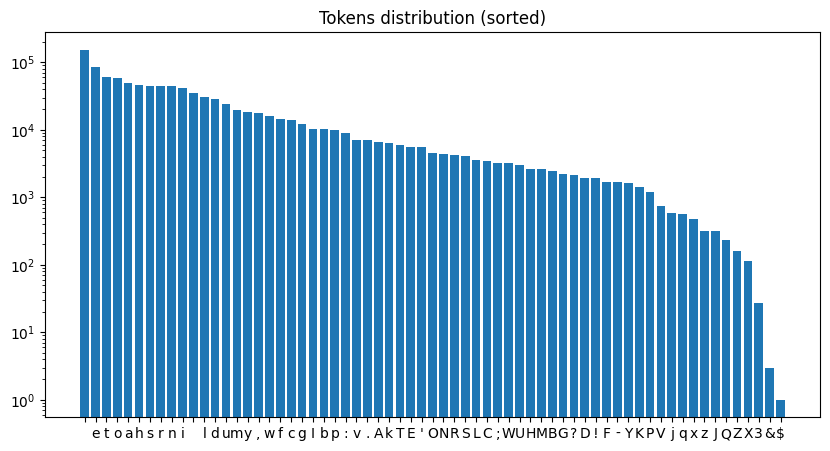

In [94]:
# first draw tokens distribution:

import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

data_dir = os.path.join('data', 'shakespeare_char')
data = np.memmap(os.path.join(data_dir, 'train.bin'), dtype=np.uint16, mode='r')

counter = Counter(data)
counts = sorted(counter.values(), reverse=True)

plt.figure(figsize=(10, 5))
plt.bar(range(len(counts)), counts)
plt.xticks(ticks=range(len(decoded_tokens)), labels=decoded_tokens)
plt.yscale('log')
plt.title('Tokens distribution (sorted)')
plt.show()

In [23]:
import os
import pickle

meta_path = 'data/shakespeare_char/meta.pkl'
load_meta = os.path.exists(meta_path)
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)
    # TODO want to make this more general to arbitrary encoder/decoder schemes
stoi, itos = meta['stoi'], meta['itos']
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])
print(decode(range(10)))


 !$&',-.3


# draw grads norms changes over time

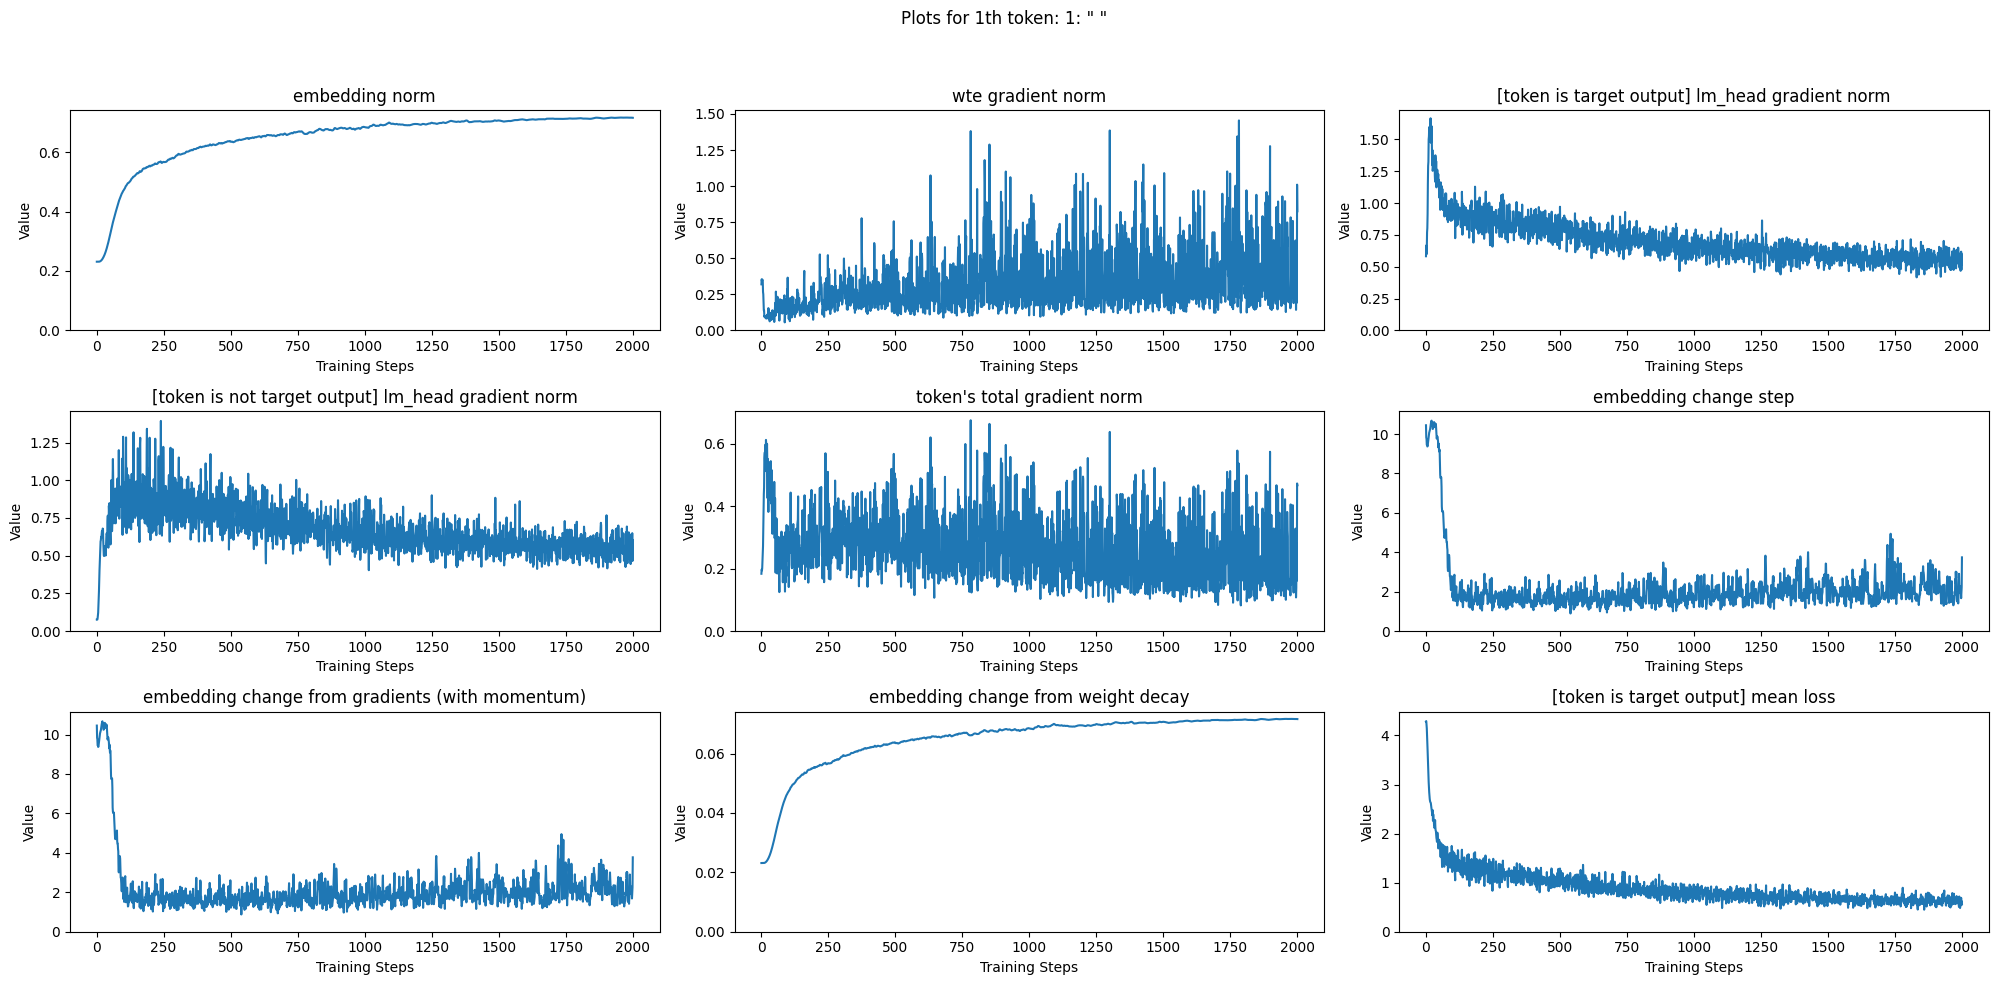

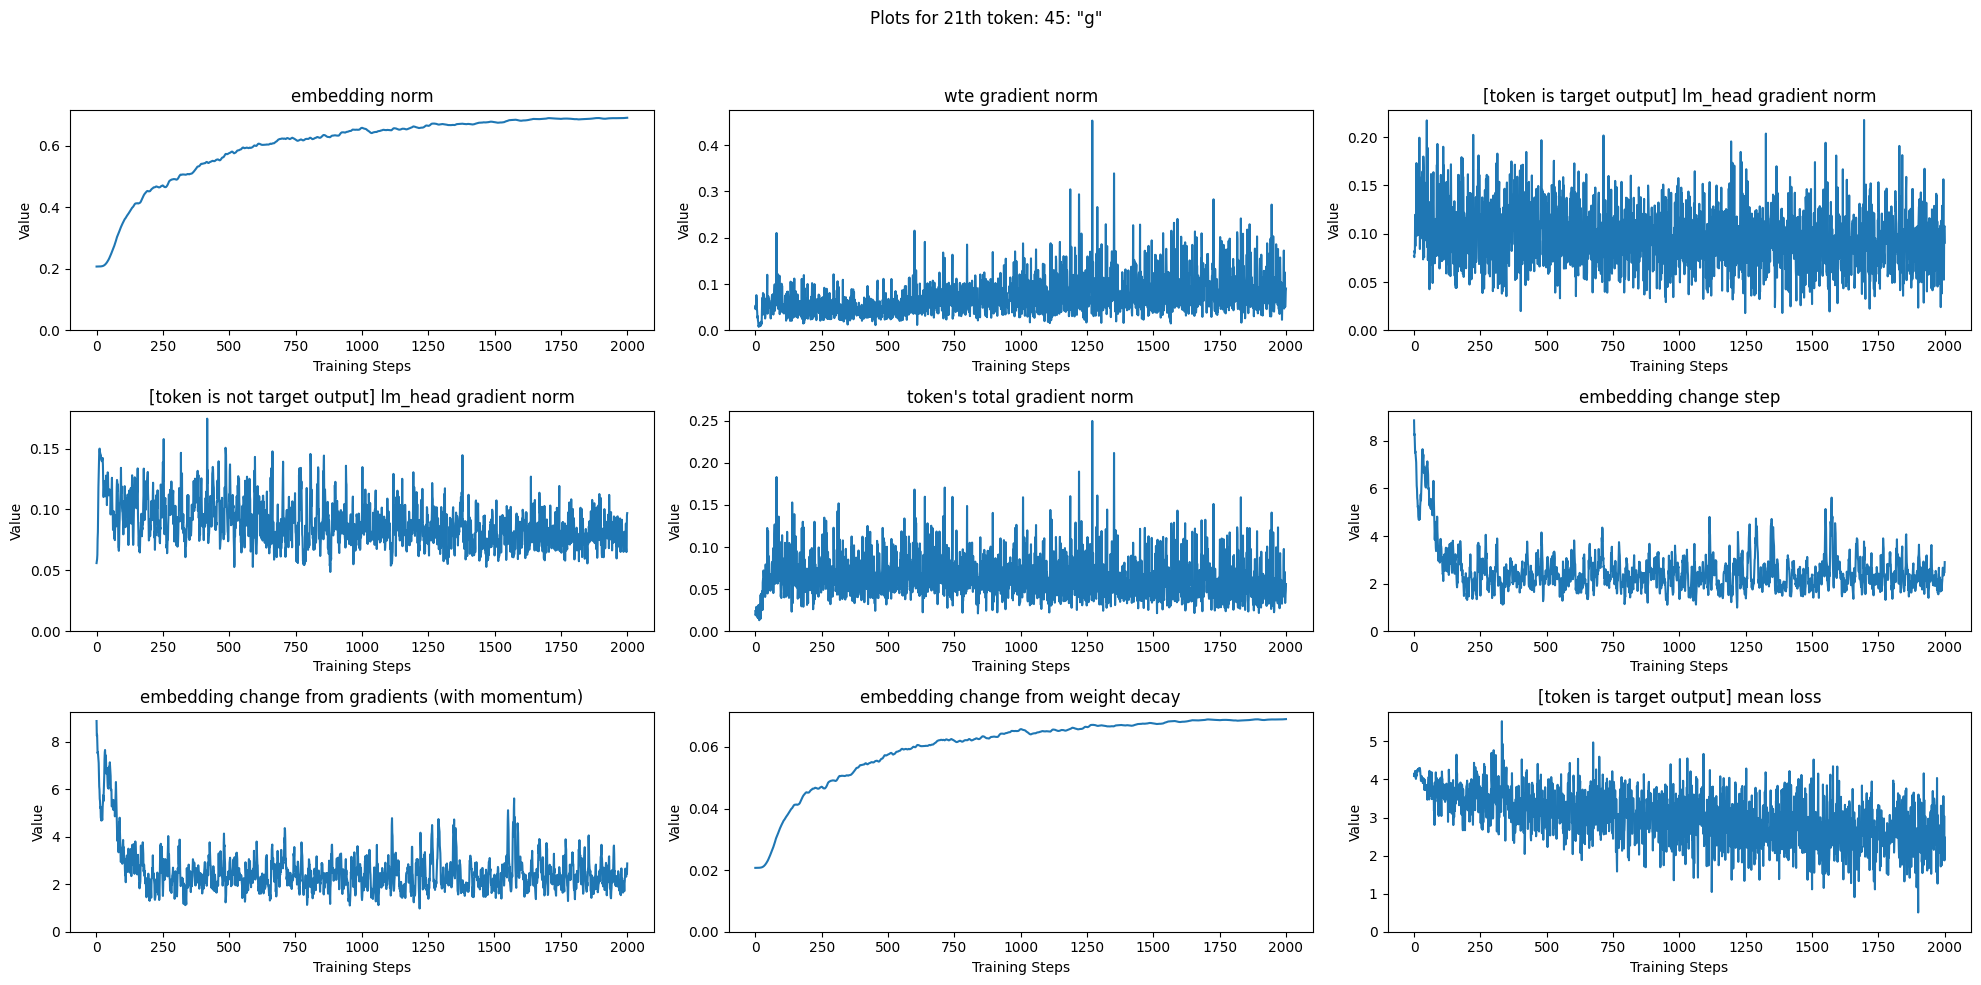

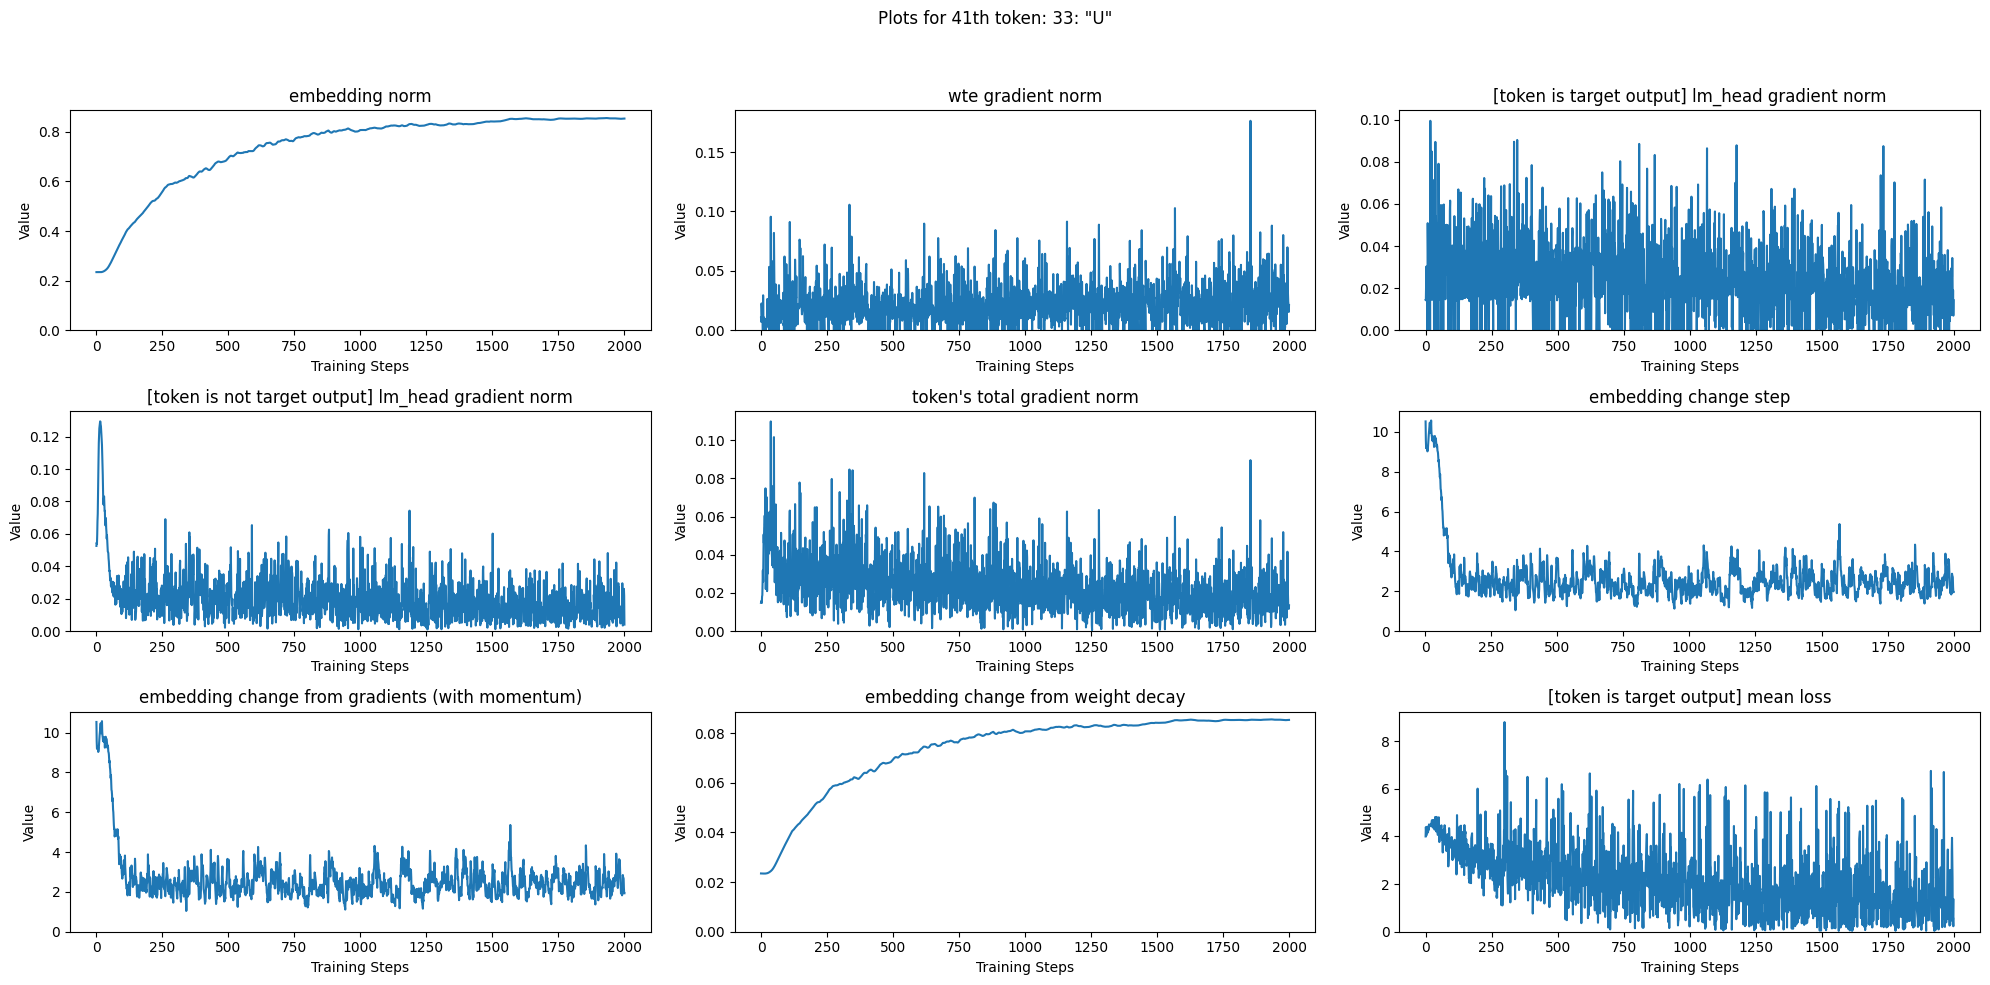

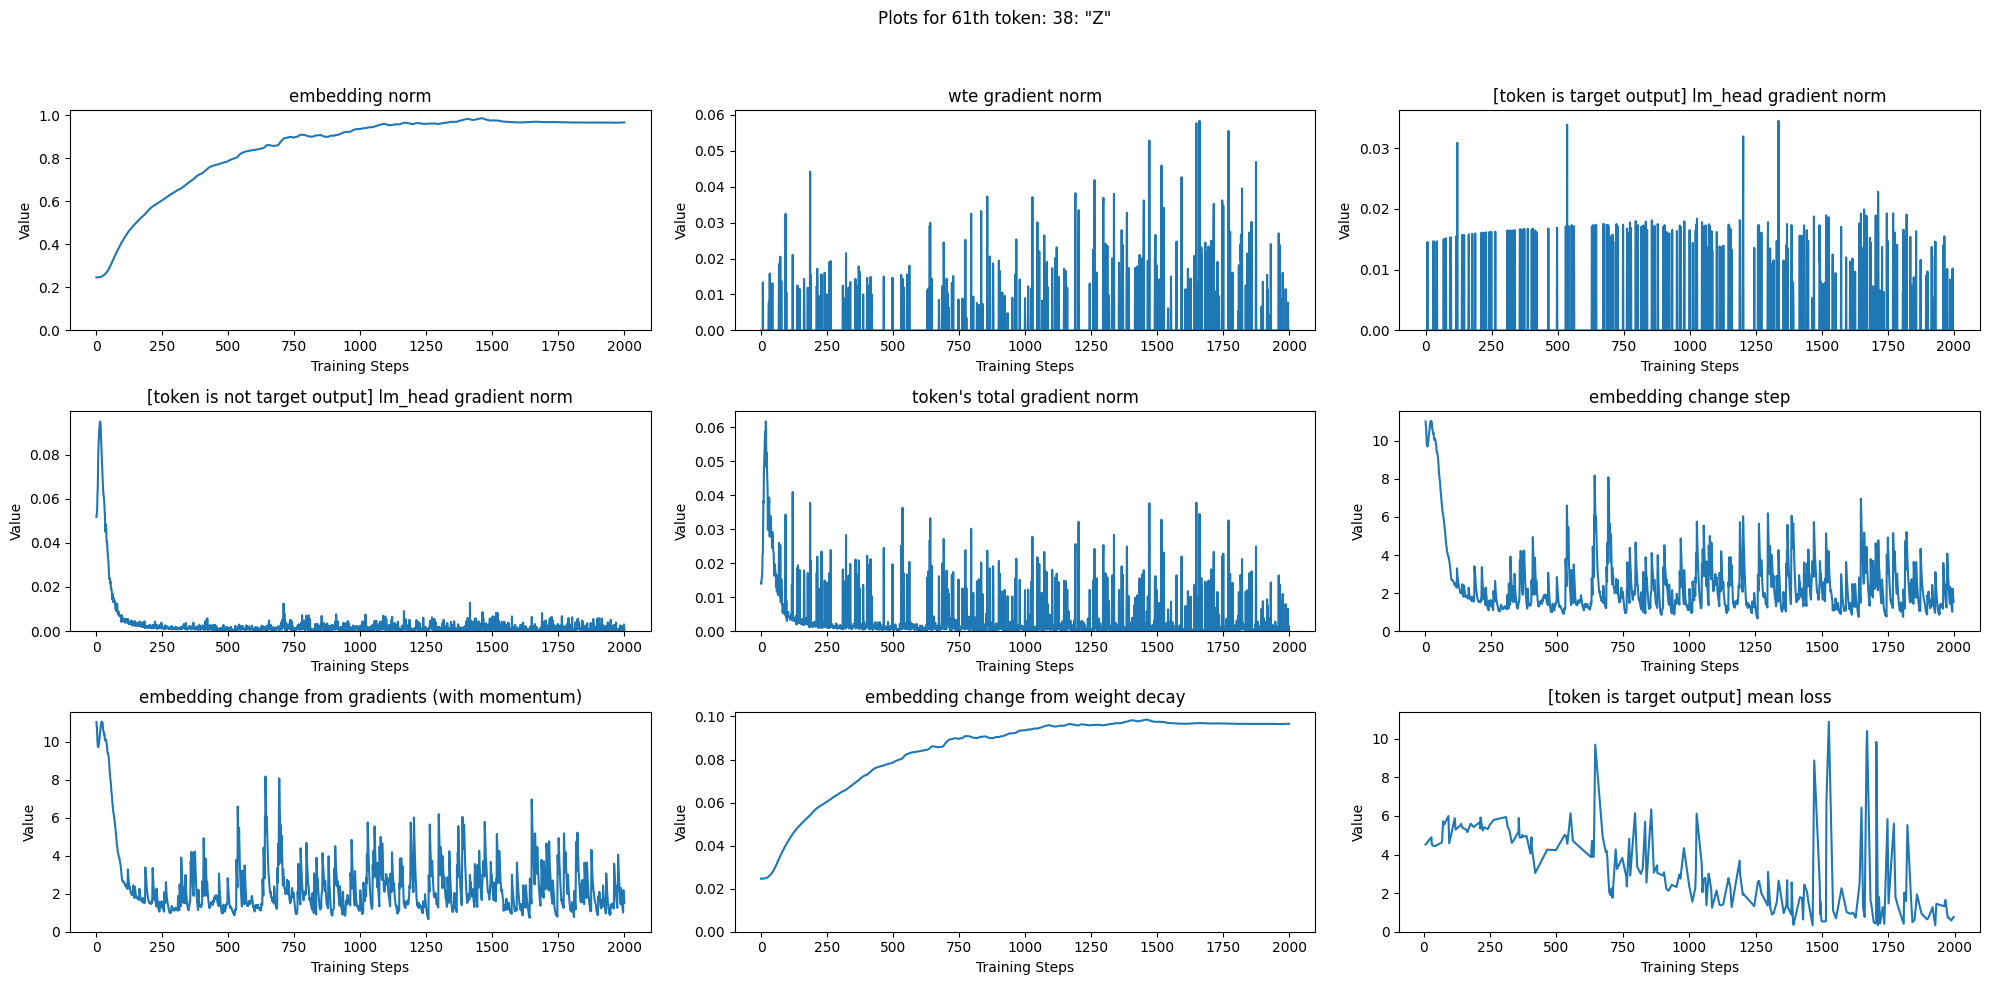

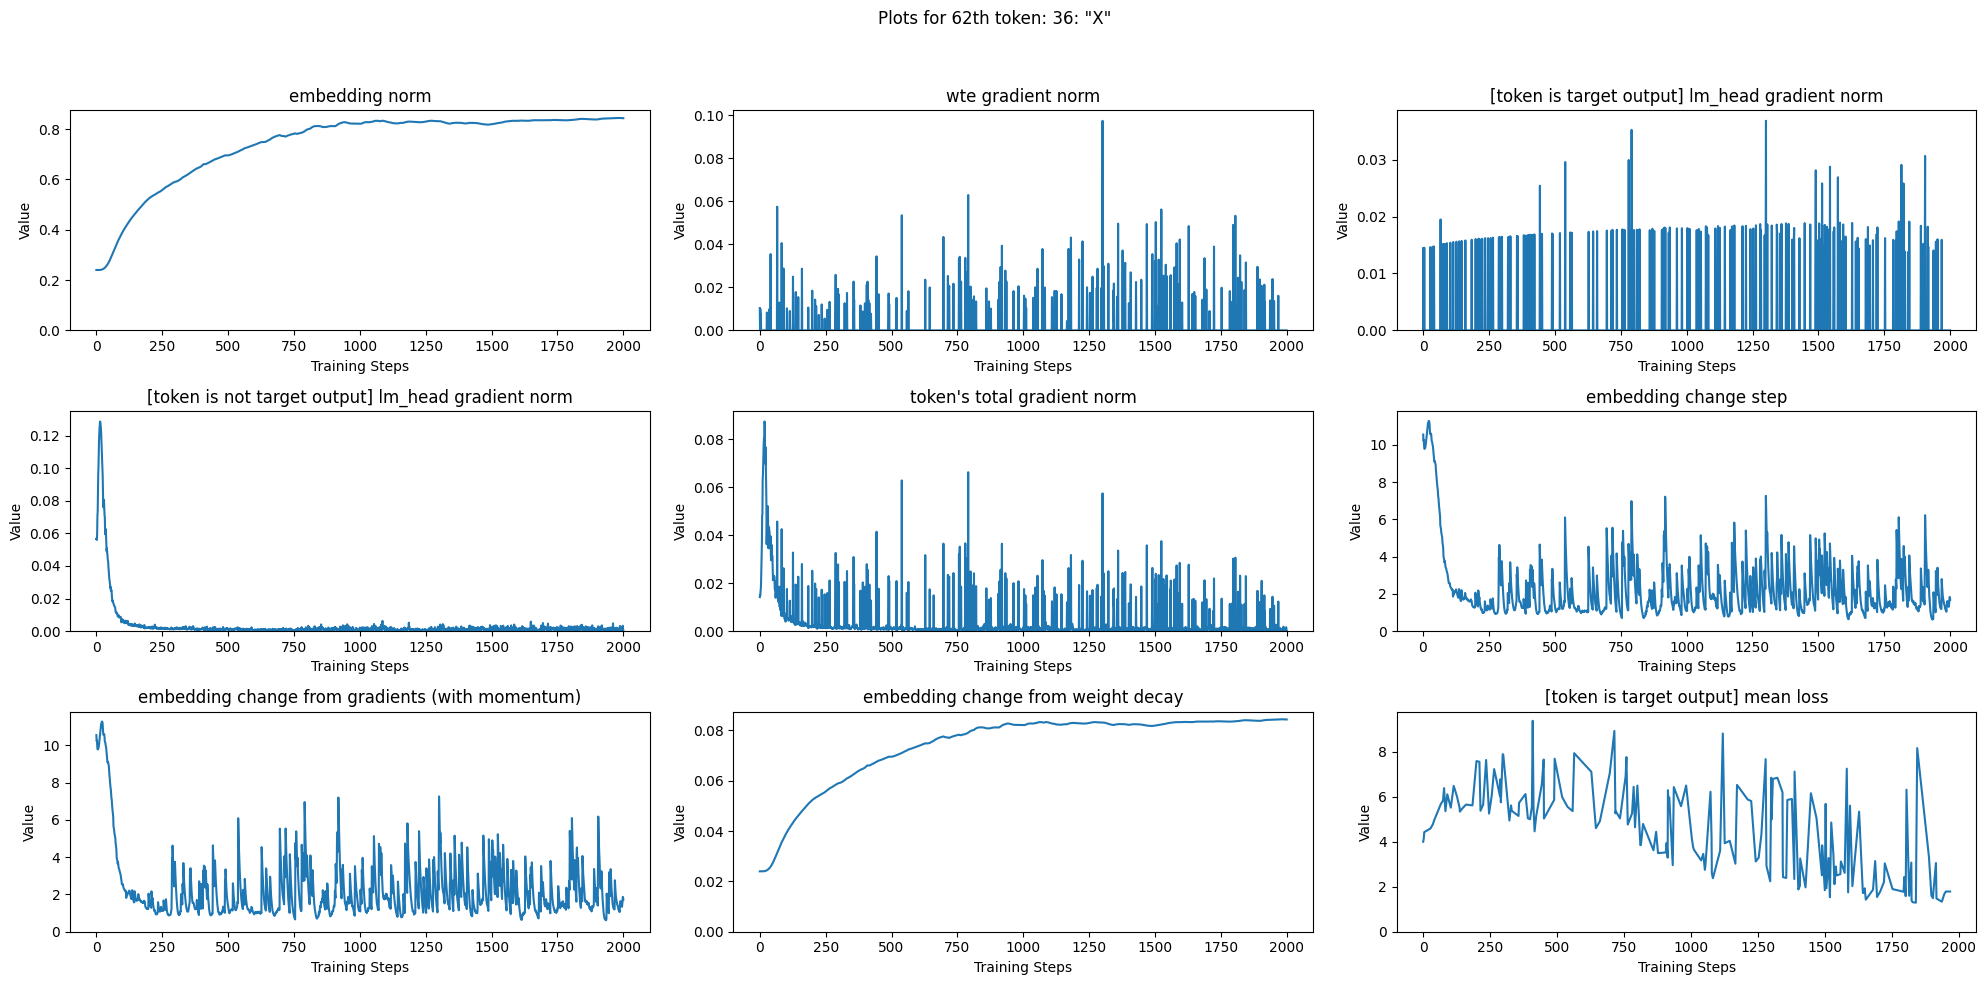

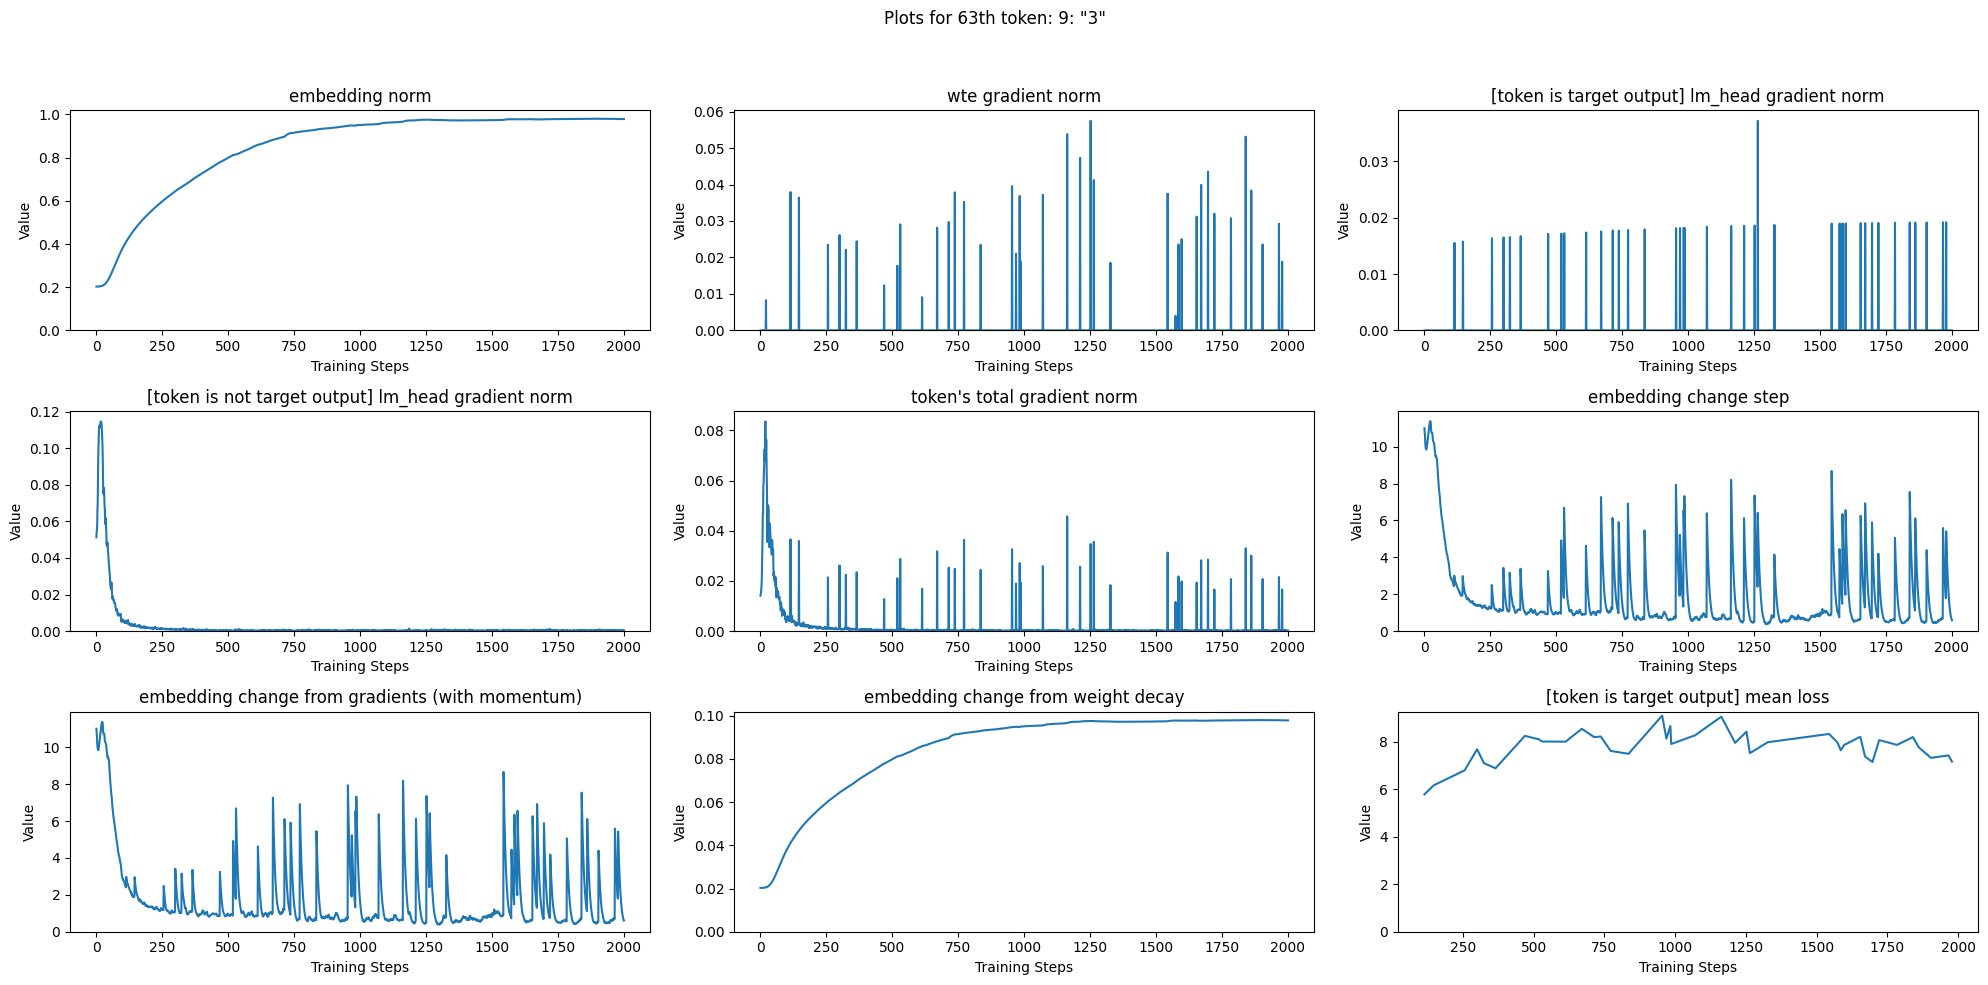

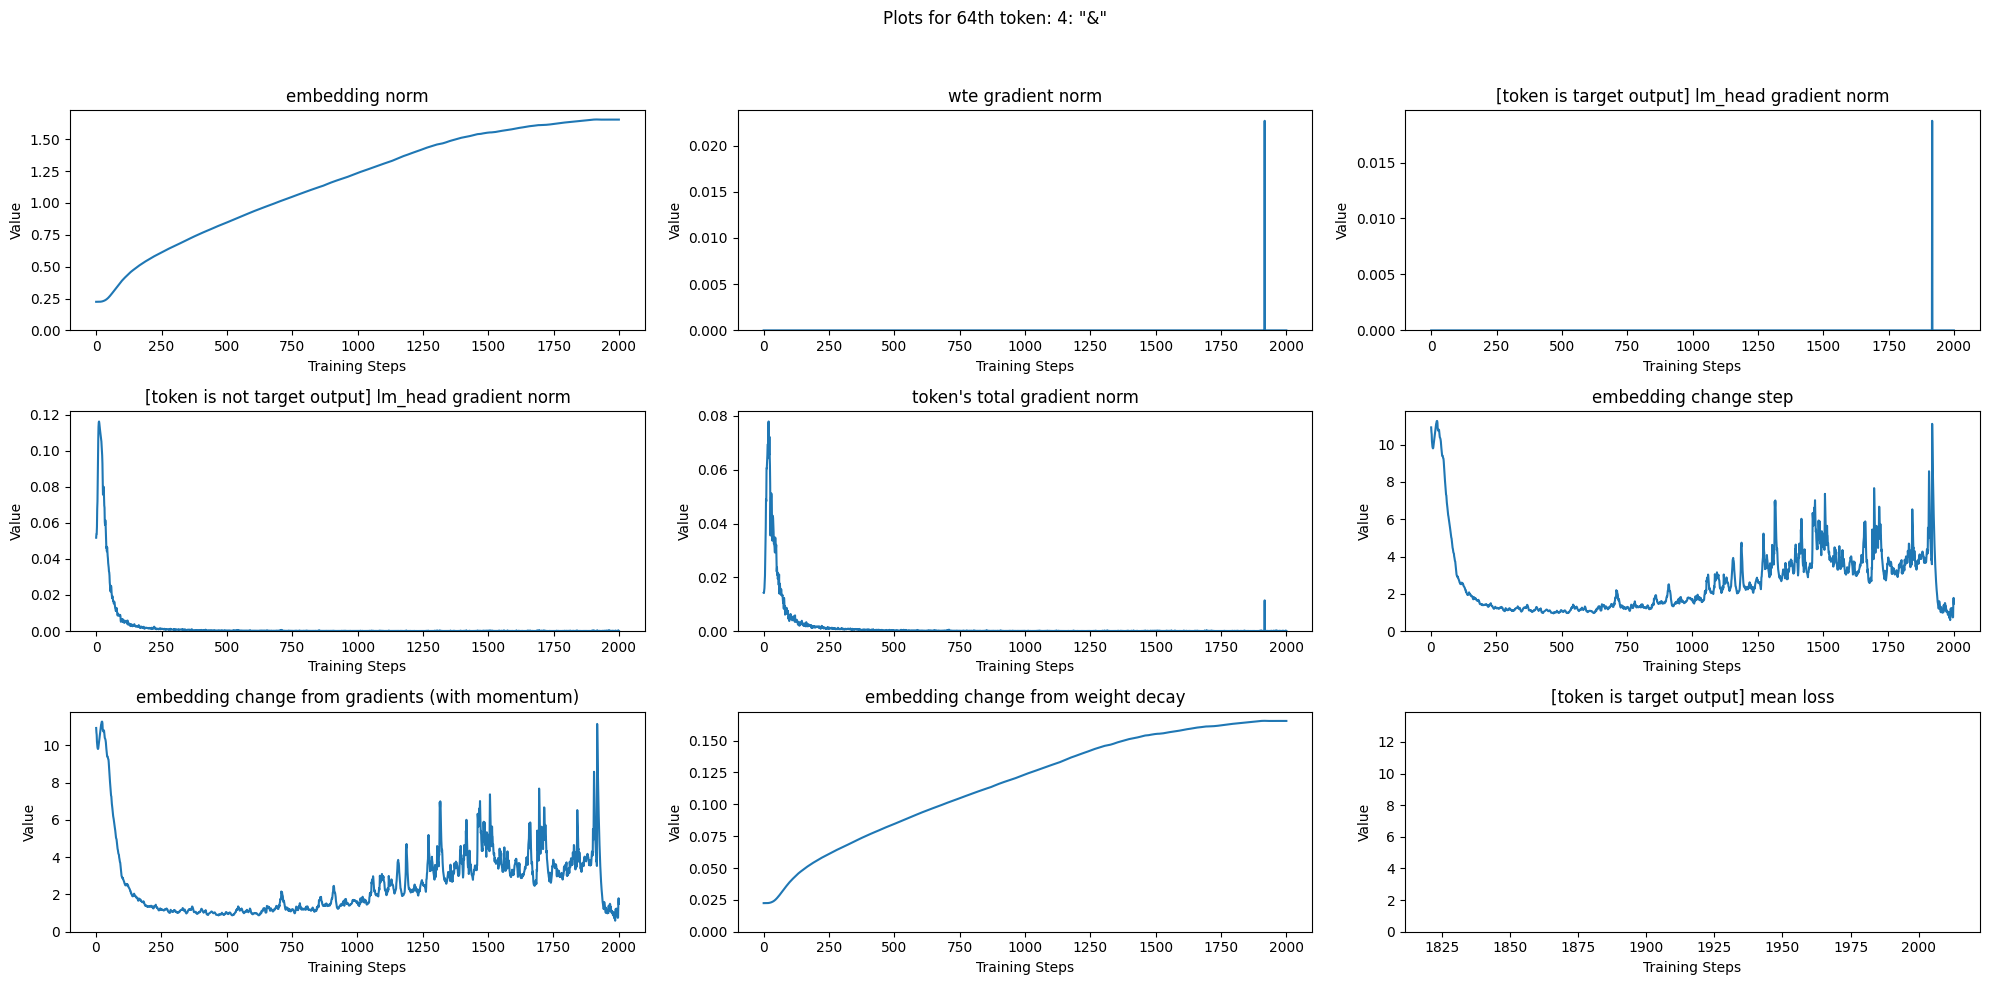

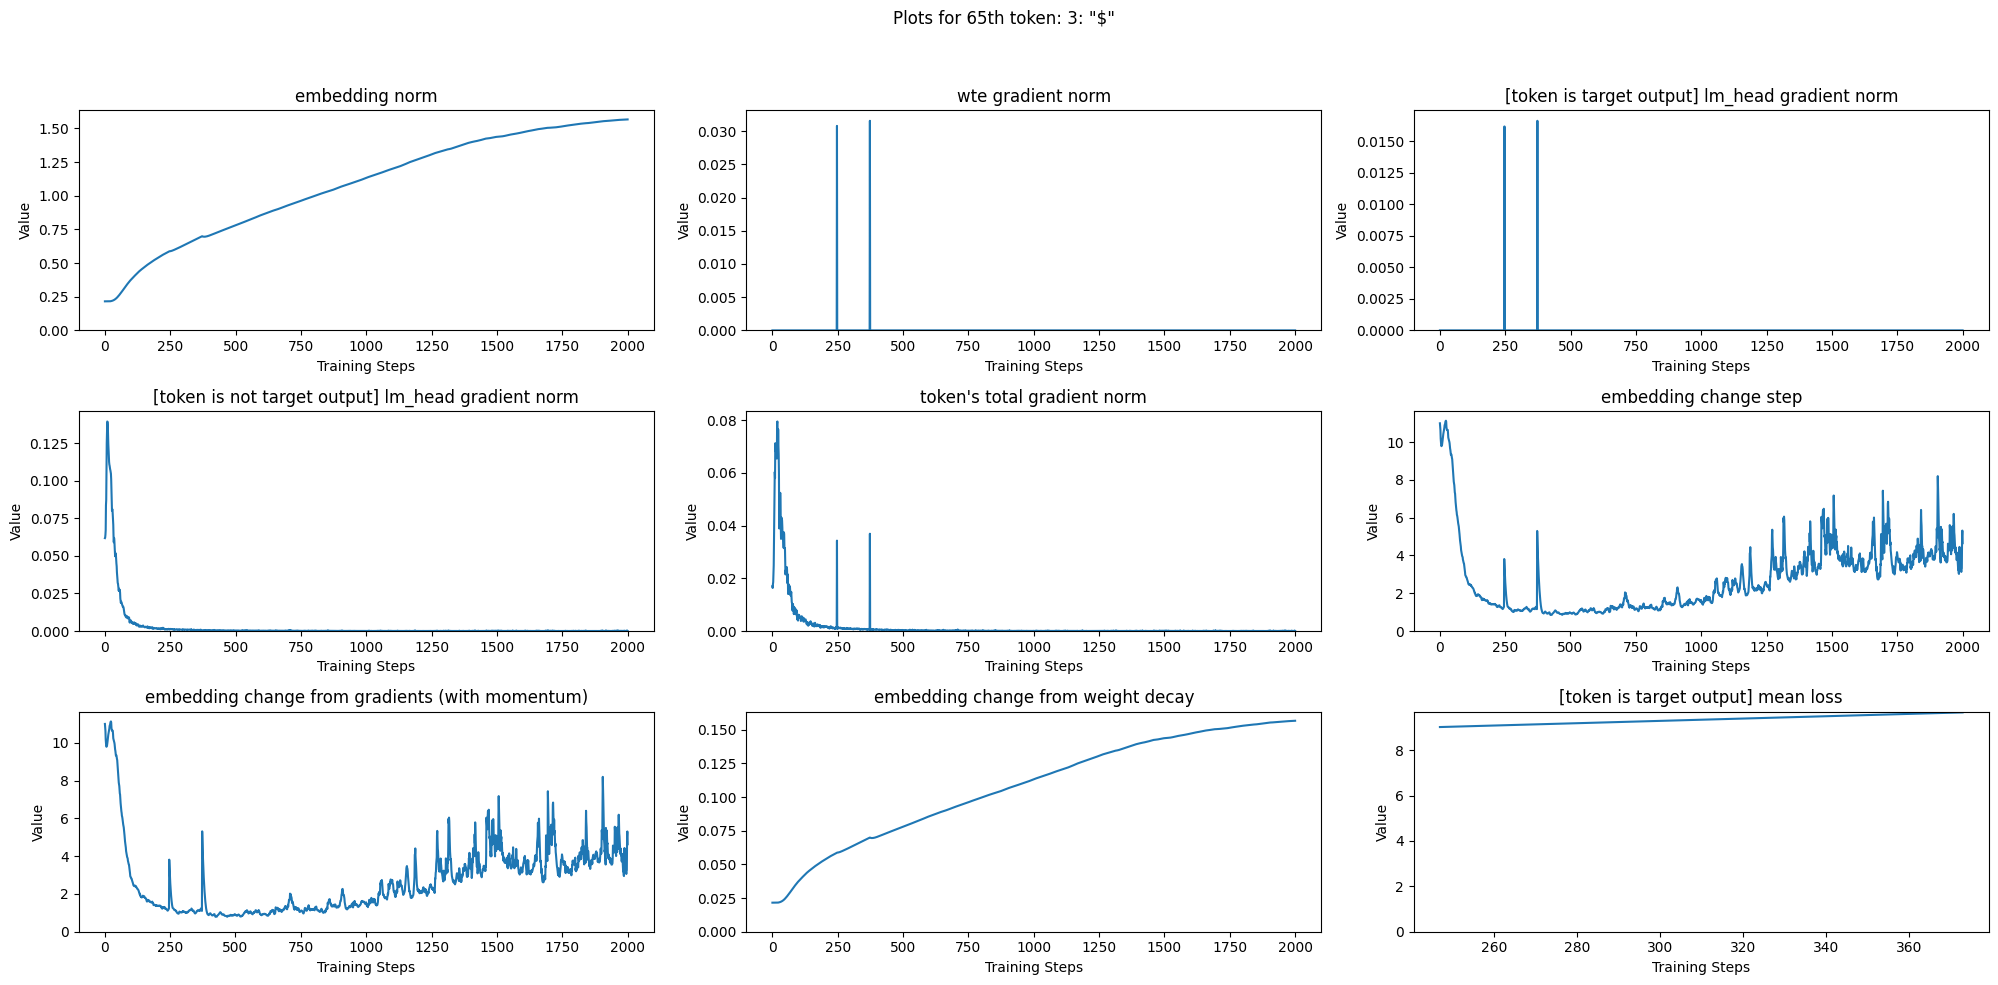

In [47]:
# Extract the list of tokens from the counter, sorted from most popular to least popular
sorted_tokens = [token for token, _ in counter.most_common()]

# Define the types of gradients
types = {
    "emb": "embedding norm",
    "grad_input": "wte gradient norm",
    "grad_output_positive": "[token is target output] lm_head gradient norm",
    "grad_output_negative": "[token is not target output] lm_head gradient norm",
    "grad_total": "token's total gradient norm",
    "grad_adam_total": "embedding change step",
    "grad_adam_moments": "embedding change from gradients (with momentum)",
    "grad_adam_decay": "embedding change from weight decay",
    "output_loss": "[token is target output] mean loss"
}

# Iterate over the sorted tokens and create the required plots
for token_index, token_id in zip(list(range(0, 61, 20)) + list(range(61, 65)), sorted_tokens[::20] + sorted_tokens[61:]):
    fig, axs = plt.subplots(3, 3, figsize=(20, 10))
    fig.suptitle(f'Plots for {token_index+1}th token: {token_id}: "{decode([token_id])}"')

    for i, (gradient_type, type_description) in enumerate(types.items()):
        ax = axs[i // 3, i % 3]
        x = np.arange(len(numpy_arrays[gradient_type][:, token_id]))
        y = numpy_arrays[gradient_type][:, token_id]
        if gradient_type == 'output_loss':
            x = x[y>0]
            y = y[y>0]
        ax.plot(x, y)
        ax.set_title(type_description)
        ax.set_xlabel('Training Steps')
        ax.set_ylabel('Value')
        ax.set_ylim(bottom=0)  # Set y-axis to start from 0

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# let's see aggregated info:

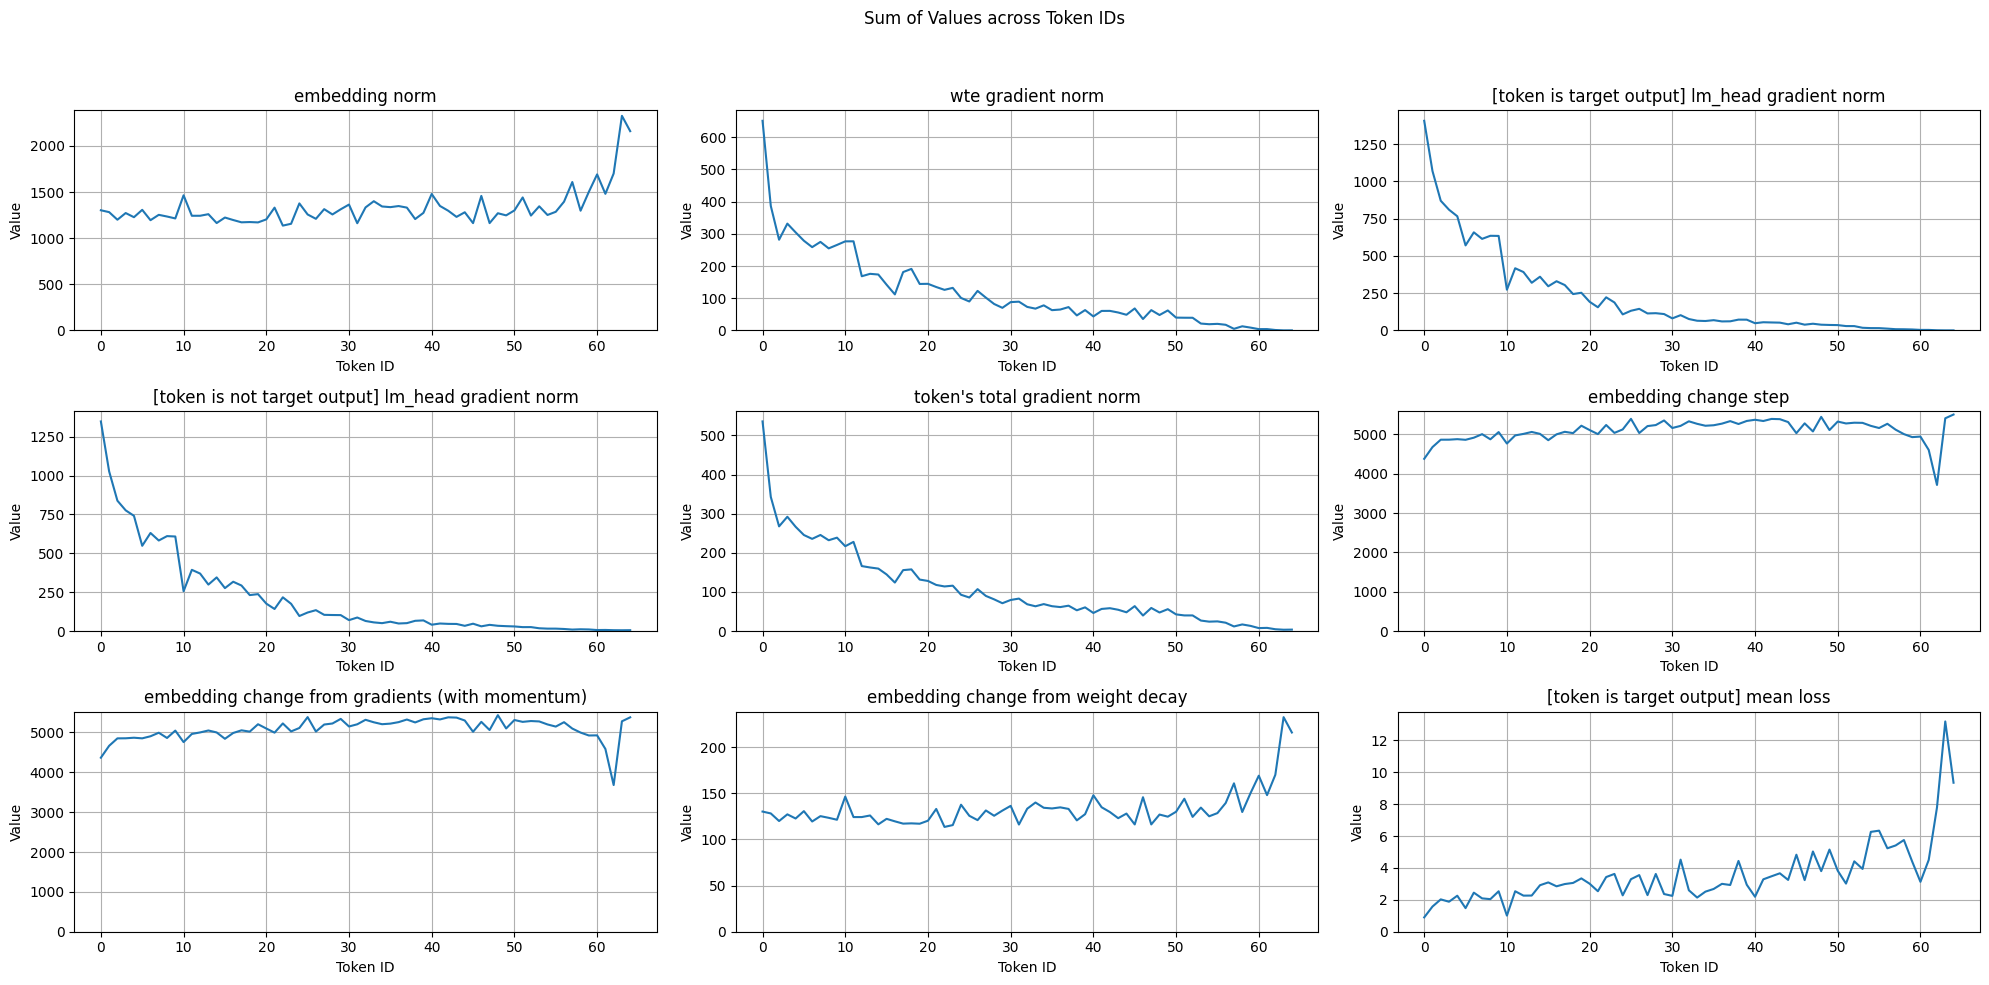

In [48]:
# Create a new figure for the token-wise sum across gradient types
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Sum of Values across Token IDs')

for i, (gradient_type, type_description) in enumerate(types.items()):
    # Calculate the sum of the gradients across all steps for each token_id
    token_sums = numpy_arrays[gradient_type][1:].sum(axis=0)
    if gradient_type == 'output_loss':
        token_sums = token_sums / ((numpy_arrays[gradient_type][1:] > 0).astype(float).sum(axis=0) + 1e-9)

    ax = axs[i // 3, i % 3]  # Determine position in the grid (4x2)
    
    # Plot the trend of the sum of gradient values across sorted token IDs
    ax.plot(token_sums[sorted_tokens])  # Only for sorted tokens
    ax.grid(True)
    ax.set_title(type_description)
    ax.set_xlabel('Token ID')
    ax.set_ylabel('Value')
    ax.set_ylim(bottom=0)  # Set y-axis to start from 0

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

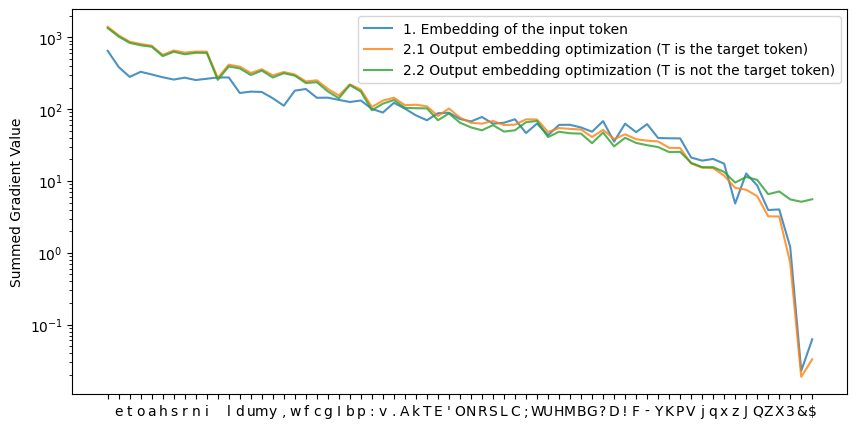

In [95]:
types = {
    "grad_input": "1. Embedding of the input token",
    "grad_output_positive": "2.1 Output embedding optimization (T is the target token)",
    "grad_output_negative": "2.2 Output embedding optimization (T is not the target token)"
}

plt.figure(figsize=(10, 5))

for i, (gradient_type, type_description) in enumerate(types.items()):
    # Calculate the sum of the gradients across all steps for each token_id
    token_sums = numpy_arrays[gradient_type][1:].sum(axis=0)
    plt.plot(token_sums[sorted_tokens], label=type_description, alpha=0.8)  # Only for sorted tokens
plt.ylabel('Summed Gradient Value')
plt.yscale('log')
plt.xticks(ticks=range(len(decoded_tokens)), labels=decoded_tokens)
plt.legend()
plt.show()

In [96]:
# now try same running with logging and check that quality do not drop

!python train.py config/train_shakespeare_char.py --device=cpu --compile=False \
        --eval_iters=20 --log_interval=1 --block_size=64 --batch_size=12 --n_layer=4 \
        --n_head=4 --n_embd=128 --max_iters=2000 --lr_decay_iters=2000 --dropout=0.0 \
        --log_output_loss=True --out_dir='out-shakespeare-char-vanilla'

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

iter 126: loss 2.5171, time 69.08ms, mfu 0.02%
iter 127: loss 2.5680, time 49.32ms, mfu 0.02%
iter 128: loss 2.5634, time 58.40ms, mfu 0.02%
iter 129: loss 2.5518, time 163.39ms, mfu 0.02%
iter 130: loss 2.5630, time 240.98ms, mfu 0.02%
iter 131: loss 2.5208, time 150.92ms, mfu 0.01%
iter 132: loss 2.5362, time 67.64ms, mfu 0.01%
iter 133: loss 2.6503, time 51.92ms, mfu 0.02%
iter 134: loss 2.5361, time 112.07ms, mfu 0.02%
iter 135: loss 2.5202, time 186.59ms, mfu 0.01%
iter 136: loss 2.6047, time 108.58ms, mfu 0.01%
iter 137: loss 2.5531, time 108.79ms, mfu 0.01%
iter 138: loss 2.5638, time 76.95ms, mfu 0.01%
iter 139: loss 2.5591, time 129.78ms, mfu 0.01%
iter 140: loss 2.5761, time 122.37ms, mfu 0.01%
iter 141: loss 2.5848, time 135.70ms, mfu 0.01%
iter 142: loss 2.4679, time 100.44ms, mfu 0.01%
iter 143: loss 2.5622, time 93.62ms, mfu 0.01%
iter 144: loss 2.6098, time 68.74ms, mfu 0.01%
iter 145: loss 2.5318, time 75.38ms, mfu 0.01%
iter 146: loss 2.5750, time 39.22ms, mfu 0.02%
it

iter 298: loss 2.4207, time 103.17ms, mfu 0.03%
iter 299: loss 2.5270, time 32.27ms, mfu 0.03%
iter 300: loss 2.4085, time 125.08ms, mfu 0.02%
iter 301: loss 2.3994, time 61.29ms, mfu 0.02%
iter 302: loss 2.3506, time 61.02ms, mfu 0.02%
iter 303: loss 2.3814, time 83.33ms, mfu 0.02%
iter 304: loss 2.4045, time 61.04ms, mfu 0.02%
iter 305: loss 2.4102, time 71.04ms, mfu 0.02%
iter 306: loss 2.4271, time 42.72ms, mfu 0.02%
iter 307: loss 2.5094, time 81.62ms, mfu 0.02%
iter 308: loss 2.5031, time 113.23ms, mfu 0.02%
iter 309: loss 2.3853, time 62.52ms, mfu 0.02%
iter 310: loss 2.3988, time 123.14ms, mfu 0.02%
iter 311: loss 2.4088, time 86.07ms, mfu 0.02%
iter 312: loss 2.4364, time 59.54ms, mfu 0.02%
iter 313: loss 2.3780, time 95.61ms, mfu 0.02%
iter 314: loss 2.3922, time 63.40ms, mfu 0.02%
iter 315: loss 2.3920, time 49.61ms, mfu 0.02%
iter 316: loss 2.4511, time 55.22ms, mfu 0.02%
iter 317: loss 2.4289, time 39.15ms, mfu 0.02%
iter 318: loss 2.4147, time 40.12ms, mfu 0.02%
iter 319:

iter 473: loss 2.3017, time 60.91ms, mfu 0.02%
iter 474: loss 2.2824, time 66.89ms, mfu 0.02%
iter 475: loss 2.2880, time 53.14ms, mfu 0.02%
iter 476: loss 2.2716, time 109.32ms, mfu 0.02%
iter 477: loss 2.3534, time 69.55ms, mfu 0.02%
iter 478: loss 2.3303, time 47.63ms, mfu 0.02%
iter 479: loss 2.2411, time 62.41ms, mfu 0.02%
iter 480: loss 2.3636, time 62.04ms, mfu 0.02%
iter 481: loss 2.1933, time 77.56ms, mfu 0.02%
iter 482: loss 2.2015, time 88.31ms, mfu 0.02%
iter 483: loss 2.2956, time 36.71ms, mfu 0.02%
iter 484: loss 2.2869, time 48.75ms, mfu 0.02%
iter 485: loss 2.3628, time 57.46ms, mfu 0.02%
iter 486: loss 2.2441, time 38.34ms, mfu 0.02%
iter 487: loss 2.3068, time 66.35ms, mfu 0.02%
iter 488: loss 2.3079, time 40.01ms, mfu 0.02%
iter 489: loss 2.3791, time 35.06ms, mfu 0.02%
iter 490: loss 2.3248, time 65.51ms, mfu 0.02%
iter 491: loss 2.3309, time 79.34ms, mfu 0.02%
iter 492: loss 2.4194, time 28.68ms, mfu 0.03%
iter 493: loss 2.2920, time 39.83ms, mfu 0.03%
iter 494: lo

iter 646: loss 2.2542, time 44.53ms, mfu 0.02%
iter 647: loss 2.1833, time 46.12ms, mfu 0.02%
iter 648: loss 2.2473, time 63.03ms, mfu 0.02%
iter 649: loss 2.1819, time 72.48ms, mfu 0.02%
iter 650: loss 2.1890, time 42.83ms, mfu 0.02%
iter 651: loss 2.1759, time 49.88ms, mfu 0.02%
iter 652: loss 2.1858, time 49.25ms, mfu 0.02%
iter 653: loss 2.1105, time 46.14ms, mfu 0.02%
iter 654: loss 2.1570, time 45.18ms, mfu 0.02%
iter 655: loss 2.1310, time 33.92ms, mfu 0.03%
iter 656: loss 2.2214, time 40.23ms, mfu 0.03%
iter 657: loss 2.2146, time 40.54ms, mfu 0.03%
iter 658: loss 2.1761, time 36.77ms, mfu 0.03%
iter 659: loss 2.2304, time 36.69ms, mfu 0.03%
iter 660: loss 2.1169, time 47.29ms, mfu 0.03%
iter 661: loss 2.1350, time 51.21ms, mfu 0.03%
iter 662: loss 2.1702, time 65.33ms, mfu 0.03%
iter 663: loss 2.1735, time 123.69ms, mfu 0.03%
iter 664: loss 2.1358, time 72.34ms, mfu 0.02%
iter 665: loss 2.0825, time 87.63ms, mfu 0.02%
iter 666: loss 2.2361, time 59.79ms, mfu 0.02%
iter 667: lo

iter 819: loss 2.1052, time 66.58ms, mfu 0.02%
iter 820: loss 2.1143, time 65.51ms, mfu 0.02%
iter 821: loss 2.1527, time 63.18ms, mfu 0.02%
iter 822: loss 2.0624, time 48.61ms, mfu 0.02%
iter 823: loss 2.2486, time 42.58ms, mfu 0.02%
iter 824: loss 2.0200, time 41.78ms, mfu 0.02%
iter 825: loss 2.0569, time 76.79ms, mfu 0.02%
iter 826: loss 2.1288, time 62.54ms, mfu 0.02%
iter 827: loss 2.0171, time 86.50ms, mfu 0.02%
iter 828: loss 1.9572, time 59.87ms, mfu 0.02%
iter 829: loss 2.0291, time 53.01ms, mfu 0.02%
iter 830: loss 2.0391, time 54.84ms, mfu 0.02%
iter 831: loss 2.1405, time 95.63ms, mfu 0.02%
iter 832: loss 2.0754, time 64.78ms, mfu 0.02%
iter 833: loss 2.0474, time 87.95ms, mfu 0.02%
iter 834: loss 2.0811, time 85.95ms, mfu 0.02%
iter 835: loss 2.1281, time 51.72ms, mfu 0.02%
iter 836: loss 2.1158, time 48.01ms, mfu 0.02%
iter 837: loss 2.0863, time 46.04ms, mfu 0.02%
iter 838: loss 2.1143, time 40.51ms, mfu 0.02%
iter 839: loss 2.0921, time 43.69ms, mfu 0.02%
iter 840: los

iter 995: loss 1.9226, time 40.41ms, mfu 0.02%
iter 996: loss 2.1199, time 64.54ms, mfu 0.02%
iter 997: loss 2.0690, time 81.90ms, mfu 0.02%
iter 998: loss 1.8874, time 49.41ms, mfu 0.02%
iter 999: loss 1.9896, time 43.88ms, mfu 0.02%
step 1000: train loss 2.0122, val loss 2.0921
saving checkpoint to out-shakespeare-char-vanilla
iter 1000: loss 2.0107, time 636.25ms, mfu 0.02%
iter 1001: loss 2.0559, time 49.83ms, mfu 0.02%
iter 1002: loss 2.0222, time 54.04ms, mfu 0.02%
iter 1003: loss 2.1349, time 65.77ms, mfu 0.02%
iter 1004: loss 1.9345, time 37.46ms, mfu 0.02%
iter 1005: loss 1.9931, time 87.55ms, mfu 0.02%
iter 1006: loss 2.0427, time 40.14ms, mfu 0.02%
iter 1007: loss 1.9721, time 40.97ms, mfu 0.02%
iter 1008: loss 1.9865, time 46.77ms, mfu 0.02%
iter 1009: loss 2.0529, time 43.74ms, mfu 0.02%
iter 1010: loss 2.0268, time 45.31ms, mfu 0.02%
iter 1011: loss 2.1729, time 47.76ms, mfu 0.03%
iter 1012: loss 1.9391, time 59.00ms, mfu 0.02%
iter 1013: loss 2.1292, time 60.73ms, mfu 0.

iter 1164: loss 1.8789, time 49.03ms, mfu 0.02%
iter 1165: loss 2.1005, time 44.74ms, mfu 0.02%
iter 1166: loss 2.0073, time 48.67ms, mfu 0.02%
iter 1167: loss 1.9908, time 50.02ms, mfu 0.02%
iter 1168: loss 1.8894, time 45.38ms, mfu 0.02%
iter 1169: loss 1.9585, time 53.41ms, mfu 0.02%
iter 1170: loss 1.9366, time 40.72ms, mfu 0.02%
iter 1171: loss 2.0638, time 45.25ms, mfu 0.03%
iter 1172: loss 1.9846, time 45.91ms, mfu 0.03%
iter 1173: loss 1.8625, time 44.72ms, mfu 0.03%
iter 1174: loss 2.1331, time 45.34ms, mfu 0.03%
iter 1175: loss 1.9935, time 42.54ms, mfu 0.03%
iter 1176: loss 1.9704, time 43.79ms, mfu 0.03%
iter 1177: loss 1.8315, time 41.12ms, mfu 0.03%
iter 1178: loss 1.9650, time 47.22ms, mfu 0.03%
iter 1179: loss 1.9064, time 46.16ms, mfu 0.03%
iter 1180: loss 1.9540, time 52.12ms, mfu 0.03%
iter 1181: loss 2.0230, time 96.31ms, mfu 0.03%
iter 1182: loss 1.9156, time 34.80ms, mfu 0.03%
iter 1183: loss 1.9024, time 49.86ms, mfu 0.03%
iter 1184: loss 1.9531, time 42.67ms, mf

iter 1333: loss 1.9039, time 82.14ms, mfu 0.02%
iter 1334: loss 1.8235, time 96.53ms, mfu 0.02%
iter 1335: loss 1.9724, time 71.62ms, mfu 0.02%
iter 1336: loss 1.9285, time 74.16ms, mfu 0.02%
iter 1337: loss 1.9621, time 89.45ms, mfu 0.02%
iter 1338: loss 1.8097, time 43.60ms, mfu 0.02%
iter 1339: loss 1.9133, time 67.17ms, mfu 0.02%
iter 1340: loss 1.8917, time 42.38ms, mfu 0.02%
iter 1341: loss 1.8693, time 46.09ms, mfu 0.02%
iter 1342: loss 1.8370, time 51.08ms, mfu 0.02%
iter 1343: loss 2.0005, time 47.34ms, mfu 0.02%
iter 1344: loss 1.8924, time 47.40ms, mfu 0.02%
iter 1345: loss 1.9245, time 47.24ms, mfu 0.02%
iter 1346: loss 1.9277, time 48.22ms, mfu 0.02%
iter 1347: loss 1.9827, time 52.94ms, mfu 0.02%
iter 1348: loss 2.0071, time 46.17ms, mfu 0.02%
iter 1349: loss 1.8074, time 48.77ms, mfu 0.02%
iter 1350: loss 1.9261, time 65.35ms, mfu 0.02%
iter 1351: loss 1.8734, time 61.81ms, mfu 0.02%
iter 1352: loss 1.9507, time 65.56ms, mfu 0.02%
iter 1353: loss 1.9848, time 55.53ms, mf

iter 1502: loss 1.8401, time 91.16ms, mfu 0.02%
iter 1503: loss 1.8470, time 86.70ms, mfu 0.02%
iter 1504: loss 1.8763, time 89.04ms, mfu 0.02%
iter 1505: loss 1.8848, time 119.62ms, mfu 0.01%
iter 1506: loss 1.8443, time 66.24ms, mfu 0.02%
iter 1507: loss 1.7416, time 76.43ms, mfu 0.02%
iter 1508: loss 1.7589, time 75.06ms, mfu 0.02%
iter 1509: loss 1.8012, time 41.97ms, mfu 0.02%
iter 1510: loss 1.8961, time 44.73ms, mfu 0.02%
iter 1511: loss 1.9271, time 60.08ms, mfu 0.02%
iter 1512: loss 1.7749, time 100.36ms, mfu 0.02%
iter 1513: loss 1.8675, time 44.86ms, mfu 0.02%
iter 1514: loss 1.8201, time 44.41ms, mfu 0.02%
iter 1515: loss 1.8354, time 44.25ms, mfu 0.02%
iter 1516: loss 1.9016, time 46.61ms, mfu 0.02%
iter 1517: loss 1.8460, time 45.55ms, mfu 0.02%
iter 1518: loss 1.7851, time 63.44ms, mfu 0.02%
iter 1519: loss 1.8177, time 87.46ms, mfu 0.02%
iter 1520: loss 1.9481, time 59.83ms, mfu 0.02%
iter 1521: loss 1.9610, time 71.13ms, mfu 0.02%
iter 1522: loss 1.8688, time 37.08ms, 

iter 1673: loss 1.8607, time 114.84ms, mfu 0.02%
iter 1674: loss 1.8712, time 49.43ms, mfu 0.02%
iter 1675: loss 1.8817, time 54.40ms, mfu 0.02%
iter 1676: loss 1.8795, time 78.45ms, mfu 0.02%
iter 1677: loss 1.7953, time 57.24ms, mfu 0.02%
iter 1678: loss 1.8825, time 71.24ms, mfu 0.02%
iter 1679: loss 1.7951, time 63.32ms, mfu 0.02%
iter 1680: loss 1.8158, time 75.49ms, mfu 0.02%
iter 1681: loss 1.8622, time 46.72ms, mfu 0.02%
iter 1682: loss 1.7359, time 47.03ms, mfu 0.02%
iter 1683: loss 1.8686, time 47.96ms, mfu 0.02%
iter 1684: loss 1.7959, time 60.03ms, mfu 0.02%
iter 1685: loss 1.8080, time 82.06ms, mfu 0.02%
iter 1686: loss 1.7637, time 86.26ms, mfu 0.02%
iter 1687: loss 1.8616, time 39.56ms, mfu 0.02%
iter 1688: loss 1.8399, time 41.41ms, mfu 0.02%
iter 1689: loss 1.7203, time 40.93ms, mfu 0.02%
iter 1690: loss 1.8176, time 49.64ms, mfu 0.02%
iter 1691: loss 1.8151, time 80.54ms, mfu 0.02%
iter 1692: loss 1.7570, time 40.90ms, mfu 0.02%
iter 1693: loss 1.8542, time 42.27ms, m

iter 1842: loss 1.7171, time 101.02ms, mfu 0.02%
iter 1843: loss 1.7483, time 42.30ms, mfu 0.02%
iter 1844: loss 1.8036, time 44.78ms, mfu 0.02%
iter 1845: loss 1.8210, time 72.80ms, mfu 0.02%
iter 1846: loss 1.7835, time 87.63ms, mfu 0.02%
iter 1847: loss 1.7993, time 57.71ms, mfu 0.02%
iter 1848: loss 1.8020, time 72.34ms, mfu 0.02%
iter 1849: loss 1.7742, time 36.24ms, mfu 0.02%
iter 1850: loss 1.7976, time 39.81ms, mfu 0.02%
iter 1851: loss 1.6880, time 56.53ms, mfu 0.02%
iter 1852: loss 1.8507, time 69.94ms, mfu 0.02%
iter 1853: loss 1.8045, time 66.80ms, mfu 0.02%
iter 1854: loss 1.8267, time 46.01ms, mfu 0.02%
iter 1855: loss 1.7254, time 45.64ms, mfu 0.02%
iter 1856: loss 1.7269, time 71.40ms, mfu 0.02%
iter 1857: loss 1.8213, time 74.63ms, mfu 0.02%
iter 1858: loss 1.8214, time 86.35ms, mfu 0.02%
iter 1859: loss 1.6574, time 91.43ms, mfu 0.02%
iter 1860: loss 1.7745, time 87.22ms, mfu 0.02%
iter 1861: loss 1.8188, time 92.31ms, mfu 0.02%
iter 1862: loss 1.9312, time 62.12ms, m

In [119]:
# now try same running with logging and check that quality do not drop

!python train.py config/train_shakespeare_char.py --device=cpu --compile=False \
        --eval_iters=20 --log_interval=1 --block_size=64 --batch_size=12 --n_layer=4 \
        --n_head=4 --n_embd=128 --max_iters=2000 --lr_decay_iters=2000 --dropout=0.0 \
        --log_output_loss=True --hard_negative_layout=2 --out_dir='out-shakespeare-char-hard-negative'

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

iter 125: loss 2.3549, time 65.11ms, mfu 0.02%
iter 126: loss 2.3979, time 79.74ms, mfu 0.02%
iter 127: loss 2.4578, time 79.09ms, mfu 0.02%
iter 128: loss 2.4435, time 39.83ms, mfu 0.02%
iter 129: loss 2.4265, time 33.76ms, mfu 0.02%
iter 130: loss 2.4303, time 40.51ms, mfu 0.02%
iter 131: loss 2.3840, time 44.88ms, mfu 0.02%
iter 132: loss 2.4012, time 71.23ms, mfu 0.02%
iter 133: loss 2.5045, time 59.68ms, mfu 0.02%
iter 134: loss 2.3931, time 34.51ms, mfu 0.02%
iter 135: loss 2.4048, time 72.95ms, mfu 0.02%
iter 136: loss 2.4866, time 42.09ms, mfu 0.02%
iter 137: loss 2.4034, time 84.10ms, mfu 0.02%
iter 138: loss 2.4378, time 47.89ms, mfu 0.02%
iter 139: loss 2.4514, time 58.12ms, mfu 0.02%
iter 140: loss 2.4637, time 79.62ms, mfu 0.02%
iter 141: loss 2.4726, time 67.49ms, mfu 0.02%
iter 142: loss 2.3368, time 31.28ms, mfu 0.02%
iter 143: loss 2.4184, time 42.08ms, mfu 0.03%
iter 144: loss 2.4836, time 36.66ms, mfu 0.03%
iter 145: loss 2.3985, time 71.22ms, mfu 0.03%
iter 146: los

iter 298: loss 2.2881, time 43.77ms, mfu 0.02%
iter 299: loss 2.3946, time 38.79ms, mfu 0.02%
iter 300: loss 2.2803, time 51.40ms, mfu 0.02%
iter 301: loss 2.2731, time 33.51ms, mfu 0.03%
iter 302: loss 2.2320, time 41.76ms, mfu 0.03%
iter 303: loss 2.2692, time 33.59ms, mfu 0.03%
iter 304: loss 2.2689, time 37.88ms, mfu 0.03%
iter 305: loss 2.3145, time 40.74ms, mfu 0.03%
iter 306: loss 2.3305, time 42.31ms, mfu 0.03%
iter 307: loss 2.3668, time 46.08ms, mfu 0.03%
iter 308: loss 2.3801, time 72.11ms, mfu 0.03%
iter 309: loss 2.2816, time 38.33ms, mfu 0.03%
iter 310: loss 2.2900, time 34.32ms, mfu 0.03%
iter 311: loss 2.3084, time 39.54ms, mfu 0.03%
iter 312: loss 2.3190, time 41.36ms, mfu 0.03%
iter 313: loss 2.2806, time 44.76ms, mfu 0.03%
iter 314: loss 2.2780, time 36.86ms, mfu 0.03%
iter 315: loss 2.2552, time 78.84ms, mfu 0.03%
iter 316: loss 2.3569, time 66.29ms, mfu 0.03%
iter 317: loss 2.3190, time 67.65ms, mfu 0.03%
iter 318: loss 2.2948, time 63.02ms, mfu 0.03%
iter 319: los

iter 473: loss 2.1550, time 57.68ms, mfu 0.02%
iter 474: loss 2.1528, time 78.38ms, mfu 0.02%
iter 475: loss 2.1362, time 74.13ms, mfu 0.02%
iter 476: loss 2.1629, time 69.06ms, mfu 0.02%
iter 477: loss 2.2090, time 48.41ms, mfu 0.02%
iter 478: loss 2.1826, time 46.67ms, mfu 0.02%
iter 479: loss 2.1174, time 52.50ms, mfu 0.02%
iter 480: loss 2.2040, time 33.27ms, mfu 0.02%
iter 481: loss 2.0750, time 38.60ms, mfu 0.02%
iter 482: loss 2.0996, time 43.03ms, mfu 0.03%
iter 483: loss 2.1845, time 46.11ms, mfu 0.03%
iter 484: loss 2.1424, time 68.75ms, mfu 0.02%
iter 485: loss 2.2210, time 39.19ms, mfu 0.03%
iter 486: loss 2.1141, time 40.07ms, mfu 0.03%
iter 487: loss 2.1807, time 31.76ms, mfu 0.03%
iter 488: loss 2.1861, time 55.05ms, mfu 0.03%
iter 489: loss 2.2364, time 95.56ms, mfu 0.03%
iter 490: loss 2.1789, time 71.06ms, mfu 0.02%
iter 491: loss 2.2020, time 56.58ms, mfu 0.02%
iter 492: loss 2.2774, time 38.98ms, mfu 0.03%
iter 493: loss 2.1577, time 39.11ms, mfu 0.03%
iter 494: los

iter 645: loss 2.0510, time 80.93ms, mfu 0.02%
iter 646: loss 2.1025, time 53.65ms, mfu 0.02%
iter 647: loss 2.0529, time 52.56ms, mfu 0.02%
iter 648: loss 2.1340, time 81.49ms, mfu 0.02%
iter 649: loss 2.0647, time 68.15ms, mfu 0.02%
iter 650: loss 2.0332, time 74.41ms, mfu 0.02%
iter 651: loss 2.0228, time 58.52ms, mfu 0.02%
iter 652: loss 2.0467, time 96.80ms, mfu 0.02%
iter 653: loss 2.0067, time 85.56ms, mfu 0.02%
iter 654: loss 2.0239, time 68.33ms, mfu 0.02%
iter 655: loss 2.0061, time 77.10ms, mfu 0.02%
iter 656: loss 2.0567, time 64.36ms, mfu 0.02%
iter 657: loss 2.0943, time 72.60ms, mfu 0.02%
iter 658: loss 2.0435, time 49.41ms, mfu 0.02%
iter 659: loss 2.0657, time 46.65ms, mfu 0.02%
iter 660: loss 1.9814, time 48.31ms, mfu 0.02%
iter 661: loss 2.0082, time 66.63ms, mfu 0.02%
iter 662: loss 1.9967, time 66.11ms, mfu 0.02%
iter 663: loss 2.0358, time 61.37ms, mfu 0.02%
iter 664: loss 2.0221, time 79.84ms, mfu 0.02%
iter 665: loss 1.9678, time 89.56ms, mfu 0.02%
iter 666: los

iter 817: loss 1.9480, time 63.14ms, mfu 0.02%
iter 818: loss 1.9262, time 56.57ms, mfu 0.02%
iter 819: loss 1.9750, time 47.16ms, mfu 0.02%
iter 820: loss 1.9463, time 64.15ms, mfu 0.02%
iter 821: loss 2.0065, time 68.82ms, mfu 0.02%
iter 822: loss 1.8960, time 34.82ms, mfu 0.02%
iter 823: loss 2.0673, time 43.76ms, mfu 0.02%
iter 824: loss 1.9031, time 50.59ms, mfu 0.02%
iter 825: loss 1.9277, time 105.67ms, mfu 0.02%
iter 826: loss 1.9954, time 83.43ms, mfu 0.02%
iter 827: loss 1.8644, time 79.94ms, mfu 0.02%
iter 828: loss 1.8452, time 100.68ms, mfu 0.02%
iter 829: loss 1.8876, time 45.63ms, mfu 0.02%
iter 830: loss 1.8923, time 48.99ms, mfu 0.02%
iter 831: loss 1.9936, time 51.51ms, mfu 0.02%
iter 832: loss 1.9394, time 76.77ms, mfu 0.02%
iter 833: loss 1.8877, time 46.72ms, mfu 0.02%
iter 834: loss 1.9011, time 118.32ms, mfu 0.02%
iter 835: loss 1.9867, time 37.23ms, mfu 0.02%
iter 836: loss 1.9891, time 48.59ms, mfu 0.02%
iter 837: loss 1.9476, time 78.43ms, mfu 0.02%
iter 838: 

iter 991: loss 1.8457, time 78.46ms, mfu 0.02%
iter 992: loss 1.8655, time 61.64ms, mfu 0.02%
iter 993: loss 1.8025, time 68.49ms, mfu 0.02%
iter 994: loss 1.8327, time 66.61ms, mfu 0.02%
iter 995: loss 1.7955, time 43.85ms, mfu 0.02%
iter 996: loss 1.9339, time 50.84ms, mfu 0.02%
iter 997: loss 1.8850, time 84.35ms, mfu 0.02%
iter 998: loss 1.7819, time 59.49ms, mfu 0.02%
iter 999: loss 1.8250, time 61.41ms, mfu 0.02%
step 1000: train loss 2.1340, val loss 2.2075
saving checkpoint to out-shakespeare-char-hard-negative
iter 1000: loss 1.8146, time 630.67ms, mfu 0.02%
iter 1001: loss 1.8973, time 88.32ms, mfu 0.02%
iter 1002: loss 1.8885, time 65.98ms, mfu 0.02%
iter 1003: loss 1.9567, time 82.77ms, mfu 0.02%
iter 1004: loss 1.7926, time 40.22ms, mfu 0.02%
iter 1005: loss 1.8810, time 42.83ms, mfu 0.02%
iter 1006: loss 1.9069, time 46.61ms, mfu 0.02%
iter 1007: loss 1.8350, time 50.18ms, mfu 0.02%
iter 1008: loss 1.8471, time 74.55ms, mfu 0.02%
iter 1009: loss 1.9074, time 36.58ms, mfu 

iter 1160: loss 1.8333, time 48.58ms, mfu 0.02%
iter 1161: loss 1.8258, time 37.35ms, mfu 0.02%
iter 1162: loss 1.7945, time 64.24ms, mfu 0.02%
iter 1163: loss 1.8161, time 99.87ms, mfu 0.02%
iter 1164: loss 1.7684, time 43.98ms, mfu 0.02%
iter 1165: loss 1.8963, time 70.72ms, mfu 0.02%
iter 1166: loss 1.8615, time 54.27ms, mfu 0.02%
iter 1167: loss 1.8145, time 41.78ms, mfu 0.02%
iter 1168: loss 1.7467, time 47.70ms, mfu 0.02%
iter 1169: loss 1.8024, time 59.50ms, mfu 0.02%
iter 1170: loss 1.8518, time 65.01ms, mfu 0.02%
iter 1171: loss 1.9161, time 71.84ms, mfu 0.02%
iter 1172: loss 1.8413, time 64.88ms, mfu 0.02%
iter 1173: loss 1.7354, time 53.14ms, mfu 0.02%
iter 1174: loss 1.9421, time 46.28ms, mfu 0.02%
iter 1175: loss 1.8651, time 50.25ms, mfu 0.02%
iter 1176: loss 1.8500, time 72.71ms, mfu 0.02%
iter 1177: loss 1.7079, time 63.68ms, mfu 0.02%
iter 1178: loss 1.8050, time 87.49ms, mfu 0.02%
iter 1179: loss 1.7513, time 86.60ms, mfu 0.02%
iter 1180: loss 1.8009, time 96.56ms, mf

iter 1329: loss 1.7237, time 83.03ms, mfu 0.02%
iter 1330: loss 1.7505, time 84.60ms, mfu 0.02%
iter 1331: loss 1.8484, time 40.74ms, mfu 0.02%
iter 1332: loss 1.8092, time 51.95ms, mfu 0.02%
iter 1333: loss 1.8015, time 66.88ms, mfu 0.02%
iter 1334: loss 1.6768, time 90.56ms, mfu 0.02%
iter 1335: loss 1.8147, time 95.34ms, mfu 0.02%
iter 1336: loss 1.7742, time 131.66ms, mfu 0.02%
iter 1337: loss 1.8243, time 72.44ms, mfu 0.02%
iter 1338: loss 1.6860, time 79.71ms, mfu 0.02%
iter 1339: loss 1.7646, time 49.78ms, mfu 0.02%
iter 1340: loss 1.7617, time 51.73ms, mfu 0.02%
iter 1341: loss 1.7285, time 64.66ms, mfu 0.02%
iter 1342: loss 1.7066, time 80.45ms, mfu 0.02%
iter 1343: loss 1.8505, time 51.60ms, mfu 0.02%
iter 1344: loss 1.7921, time 51.70ms, mfu 0.02%
iter 1345: loss 1.7916, time 48.85ms, mfu 0.02%
iter 1346: loss 1.7963, time 45.90ms, mfu 0.02%
iter 1347: loss 1.8560, time 48.05ms, mfu 0.02%
iter 1348: loss 1.8519, time 57.40ms, mfu 0.02%
iter 1349: loss 1.6611, time 101.96ms, 

step 1500: train loss 1.9908, val loss 2.1116
saving checkpoint to out-shakespeare-char-hard-negative
iter 1500: loss 1.7421, time 855.77ms, mfu 0.02%
iter 1501: loss 1.7625, time 93.68ms, mfu 0.02%
iter 1502: loss 1.7016, time 70.40ms, mfu 0.02%
iter 1503: loss 1.7166, time 50.72ms, mfu 0.02%
iter 1504: loss 1.7486, time 70.43ms, mfu 0.02%
iter 1505: loss 1.7257, time 100.90ms, mfu 0.02%
iter 1506: loss 1.6875, time 62.69ms, mfu 0.02%
iter 1507: loss 1.6151, time 110.96ms, mfu 0.02%
iter 1508: loss 1.6183, time 69.47ms, mfu 0.02%
iter 1509: loss 1.6591, time 100.63ms, mfu 0.02%
iter 1510: loss 1.7593, time 53.16ms, mfu 0.02%
iter 1511: loss 1.8026, time 49.93ms, mfu 0.02%
iter 1512: loss 1.6693, time 100.48ms, mfu 0.02%
iter 1513: loss 1.7172, time 80.74ms, mfu 0.02%
iter 1514: loss 1.6616, time 50.05ms, mfu 0.02%
iter 1515: loss 1.7106, time 46.98ms, mfu 0.02%
iter 1516: loss 1.7238, time 57.54ms, mfu 0.02%
iter 1517: loss 1.6822, time 82.10ms, mfu 0.02%
iter 1518: loss 1.6549, time 

iter 1669: loss 1.6504, time 82.04ms, mfu 0.02%
iter 1670: loss 1.7244, time 109.45ms, mfu 0.02%
iter 1671: loss 1.6101, time 85.76ms, mfu 0.02%
iter 1672: loss 1.7302, time 73.24ms, mfu 0.02%
iter 1673: loss 1.7211, time 62.43ms, mfu 0.02%
iter 1674: loss 1.7086, time 76.57ms, mfu 0.02%
iter 1675: loss 1.7327, time 46.42ms, mfu 0.02%
iter 1676: loss 1.7249, time 89.64ms, mfu 0.02%
iter 1677: loss 1.6719, time 104.08ms, mfu 0.02%
iter 1678: loss 1.7044, time 86.80ms, mfu 0.02%
iter 1679: loss 1.6033, time 70.23ms, mfu 0.02%
iter 1680: loss 1.6873, time 131.82ms, mfu 0.02%
iter 1681: loss 1.7306, time 48.80ms, mfu 0.02%
iter 1682: loss 1.6116, time 45.31ms, mfu 0.02%
iter 1683: loss 1.7216, time 79.08ms, mfu 0.02%
iter 1684: loss 1.6879, time 77.34ms, mfu 0.02%
iter 1685: loss 1.6986, time 94.95ms, mfu 0.02%
iter 1686: loss 1.6423, time 89.62ms, mfu 0.02%
iter 1687: loss 1.6957, time 117.15ms, mfu 0.02%
iter 1688: loss 1.6955, time 87.98ms, mfu 0.02%
iter 1689: loss 1.5847, time 75.72ms

iter 1837: loss 1.5969, time 43.08ms, mfu 0.02%
iter 1838: loss 1.6875, time 48.96ms, mfu 0.02%
iter 1839: loss 1.5708, time 62.95ms, mfu 0.02%
iter 1840: loss 1.5687, time 83.69ms, mfu 0.02%
iter 1841: loss 1.6680, time 36.94ms, mfu 0.02%
iter 1842: loss 1.5887, time 42.79ms, mfu 0.02%
iter 1843: loss 1.6119, time 44.90ms, mfu 0.02%
iter 1844: loss 1.6829, time 78.69ms, mfu 0.02%
iter 1845: loss 1.6632, time 75.02ms, mfu 0.02%
iter 1846: loss 1.6309, time 69.06ms, mfu 0.02%
iter 1847: loss 1.6630, time 54.23ms, mfu 0.02%
iter 1848: loss 1.6402, time 35.93ms, mfu 0.02%
iter 1849: loss 1.6461, time 66.94ms, mfu 0.02%
iter 1850: loss 1.6729, time 47.14ms, mfu 0.02%
iter 1851: loss 1.5570, time 50.65ms, mfu 0.02%
iter 1852: loss 1.7185, time 51.78ms, mfu 0.02%
iter 1853: loss 1.6553, time 48.88ms, mfu 0.02%
iter 1854: loss 1.6633, time 49.05ms, mfu 0.02%
iter 1855: loss 1.6354, time 66.48ms, mfu 0.02%
iter 1856: loss 1.5907, time 78.03ms, mfu 0.02%
iter 1857: loss 1.6769, time 43.75ms, mf

In [120]:
state_dict_path = './out-shakespeare-char-vanilla/grad_logger_state_dict.pth'
state_dict = torch.load(state_dict_path)
    
    # Convert each tensor in the state dict to a NumPy array
logs_vanilla = {k: v.detach().numpy() for k, v in state_dict.items()}

state_dict_path = './out-shakespeare-char-hard-negative/grad_logger_state_dict.pth'
state_dict = torch.load(state_dict_path)
    
    # Convert each tensor in the state dict to a NumPy array
logs_hard_negative = {k: v.detach().numpy() for k, v in state_dict.items()}

/tmp/ipykernel_11/2685574038.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/tmp/ipykernel_11/2685574038.py:8: FutureWarning: Y

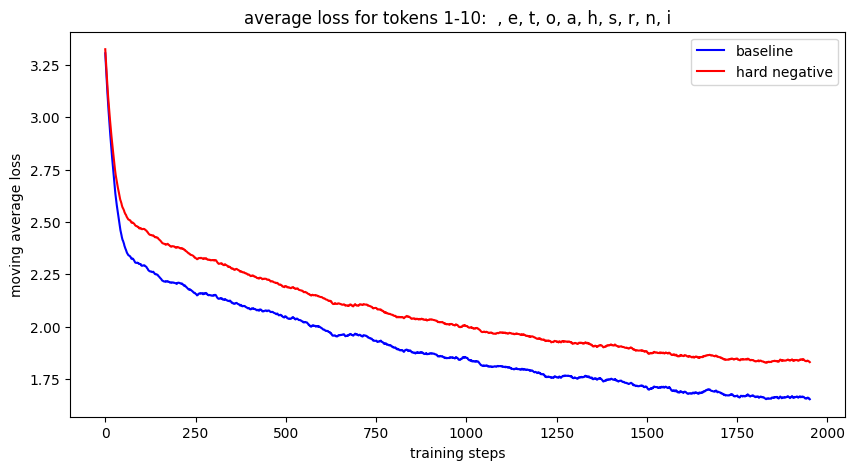

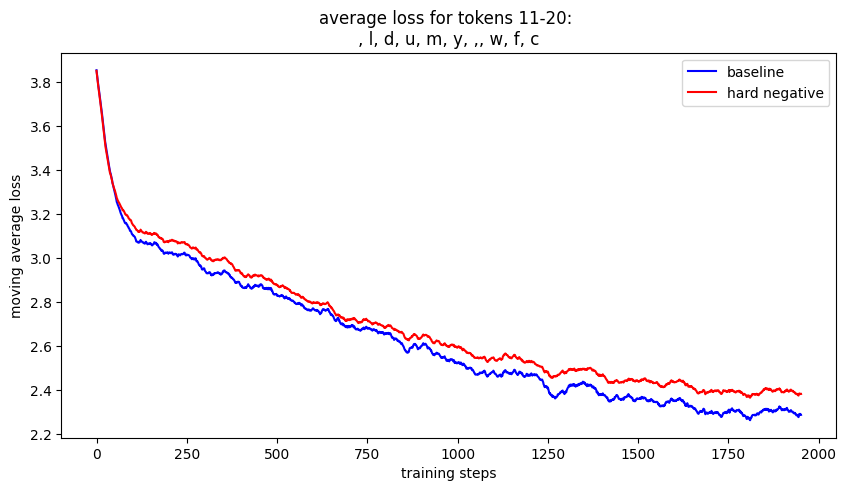

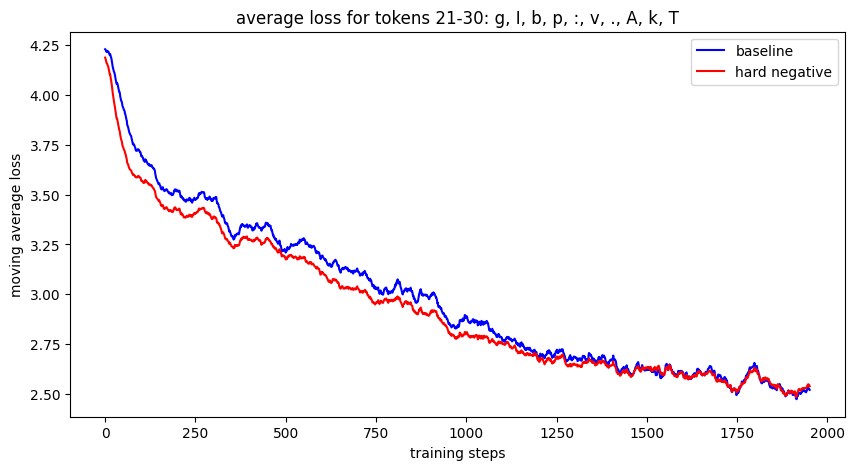

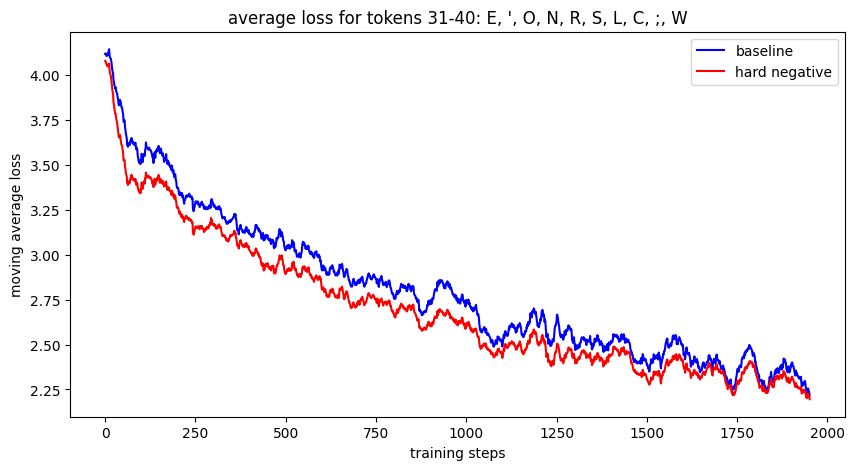

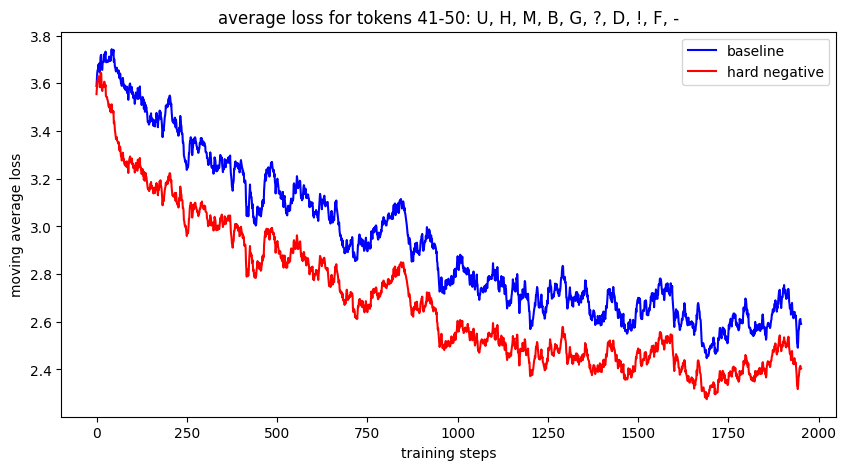

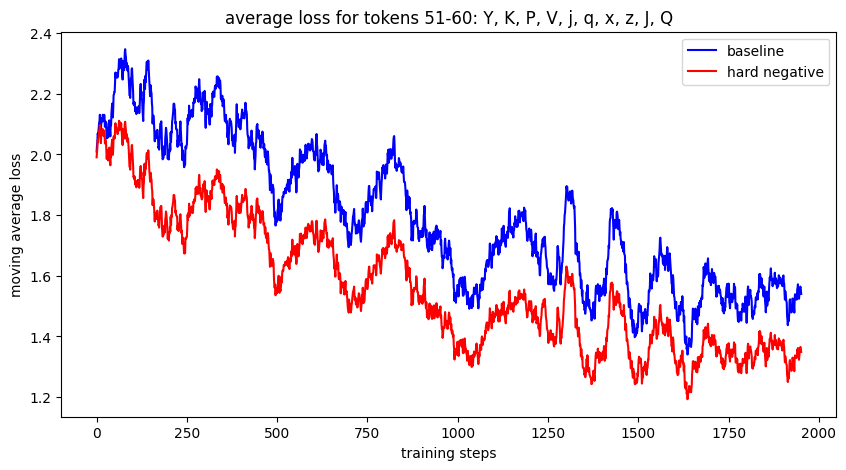

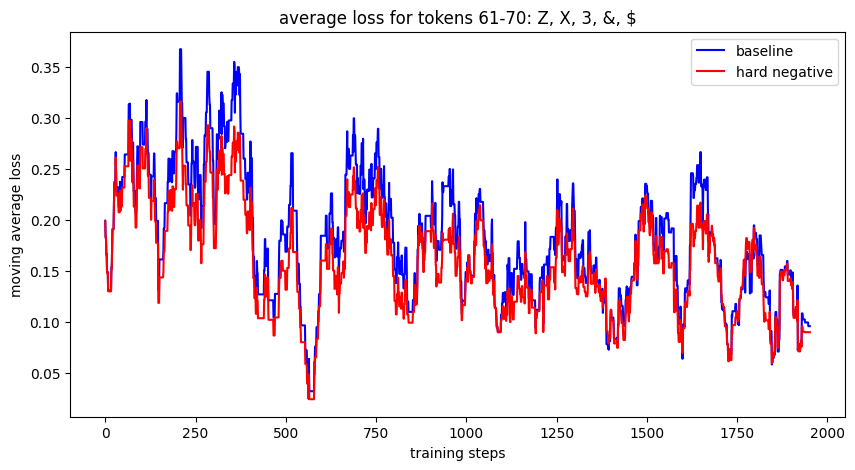

In [128]:
tokens_in_group = 10
for i in range(0, 65, tokens_in_group):
    current_indices = sorted_tokens[i:i+tokens_in_group]
    loss_vanilla = logs_vanilla['output_loss'][:, current_indices].mean(axis=1)
    loss_vanilla = np.convolve(loss_vanilla, np.ones(50)/50, mode='valid')

    loss_hard_negative = logs_hard_negative['output_loss'][:, current_indices].mean(axis=1)
    loss_hard_negative = np.convolve(loss_hard_negative, np.ones(50)/50, mode='valid')

    plt.figure(figsize=(10, 5))
    plt.plot(loss_vanilla, color='blue', label="baseline")
    plt.plot(loss_hard_negative, color='red', label="hard negative")
    plt.ylabel('moving average loss')
    plt.xlabel('training steps')
    plt.title(f'average loss for tokens {i+1}-{i+tokens_in_group}: {", ".join(decoded_tokens[i:i+tokens_in_group])}')
    plt.legend()
    plt.show()